## Thiết lập notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Bỏ qua tất cả cảnh báo
warnings.filterwarnings('ignore')

# Tải dữ liệu vào DataFrame

In [6]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

In [8]:
features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1    5/2/2010        42.31       2.572        NaN        NaN   
1      1   12/2/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1    5/3/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [10]:
sales.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1    5/2/2010      24924.50      False
1      1     1   12/2/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1    5/3/2010      21827.90      False

In [12]:
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

### Cần đổi định dạng ngày tháng, và xử lý dữ liệu thiếu

In [15]:
# Điền giá trị NaN trong các cột MarkDown bằng 0
features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = features[
    ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

# Điền giá trị NaN trong cột CPI và Unemployment bằng phương pháp forward fill
features[['CPI', 'Unemployment']] = features[['CPI', 'Unemployment']].fillna(method='ffill')

In [17]:
# Định dạng ngày tháng
features['Date'] = pd.to_datetime(features['Date'],format="%d/%m/%Y")
sales['Date'] = pd.to_datetime(sales['Date'],format="%d/%m/%Y")

## Tạo một bộ dữ liệu hợp nhất - Dựa trên Dữ liệu Bán hàng

In [20]:
# Đầu tiên chúng ta sẽ kết hợp features và sales
featSaleDF = pd.merge(features,sales, on=['Store','Date','IsHoliday'],how='left')

# # Tiếp tục kết hợp với dataframe stores 
mergedDF = pd.merge(featSaleDF,stores, on=['Store'], how='left')

mergedDF.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
1      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
2      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
3      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
4      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Dept  \
0        0.0        0.0  211.096358         8.106      False   1.0   
1        0.0        0.0  211.096358         8.106      False   2.0   
2        0.0        0.0  211.096358         8.106      False   3.0   
3        0.0        0.0  211.096358         8.106      False   4.0   
4        0.0        0.0  211.096358         8.106      False   5.0   

   Weekly_Sales Type    Size  
0      24924.50    A  151315  
1      50605.27    A  151315  
2      13740.12    A  151315  
3      39954.04    A  151315  
4      32229.38    A  151315

### Hiển thị dữ liệu sau khi hợp nhất

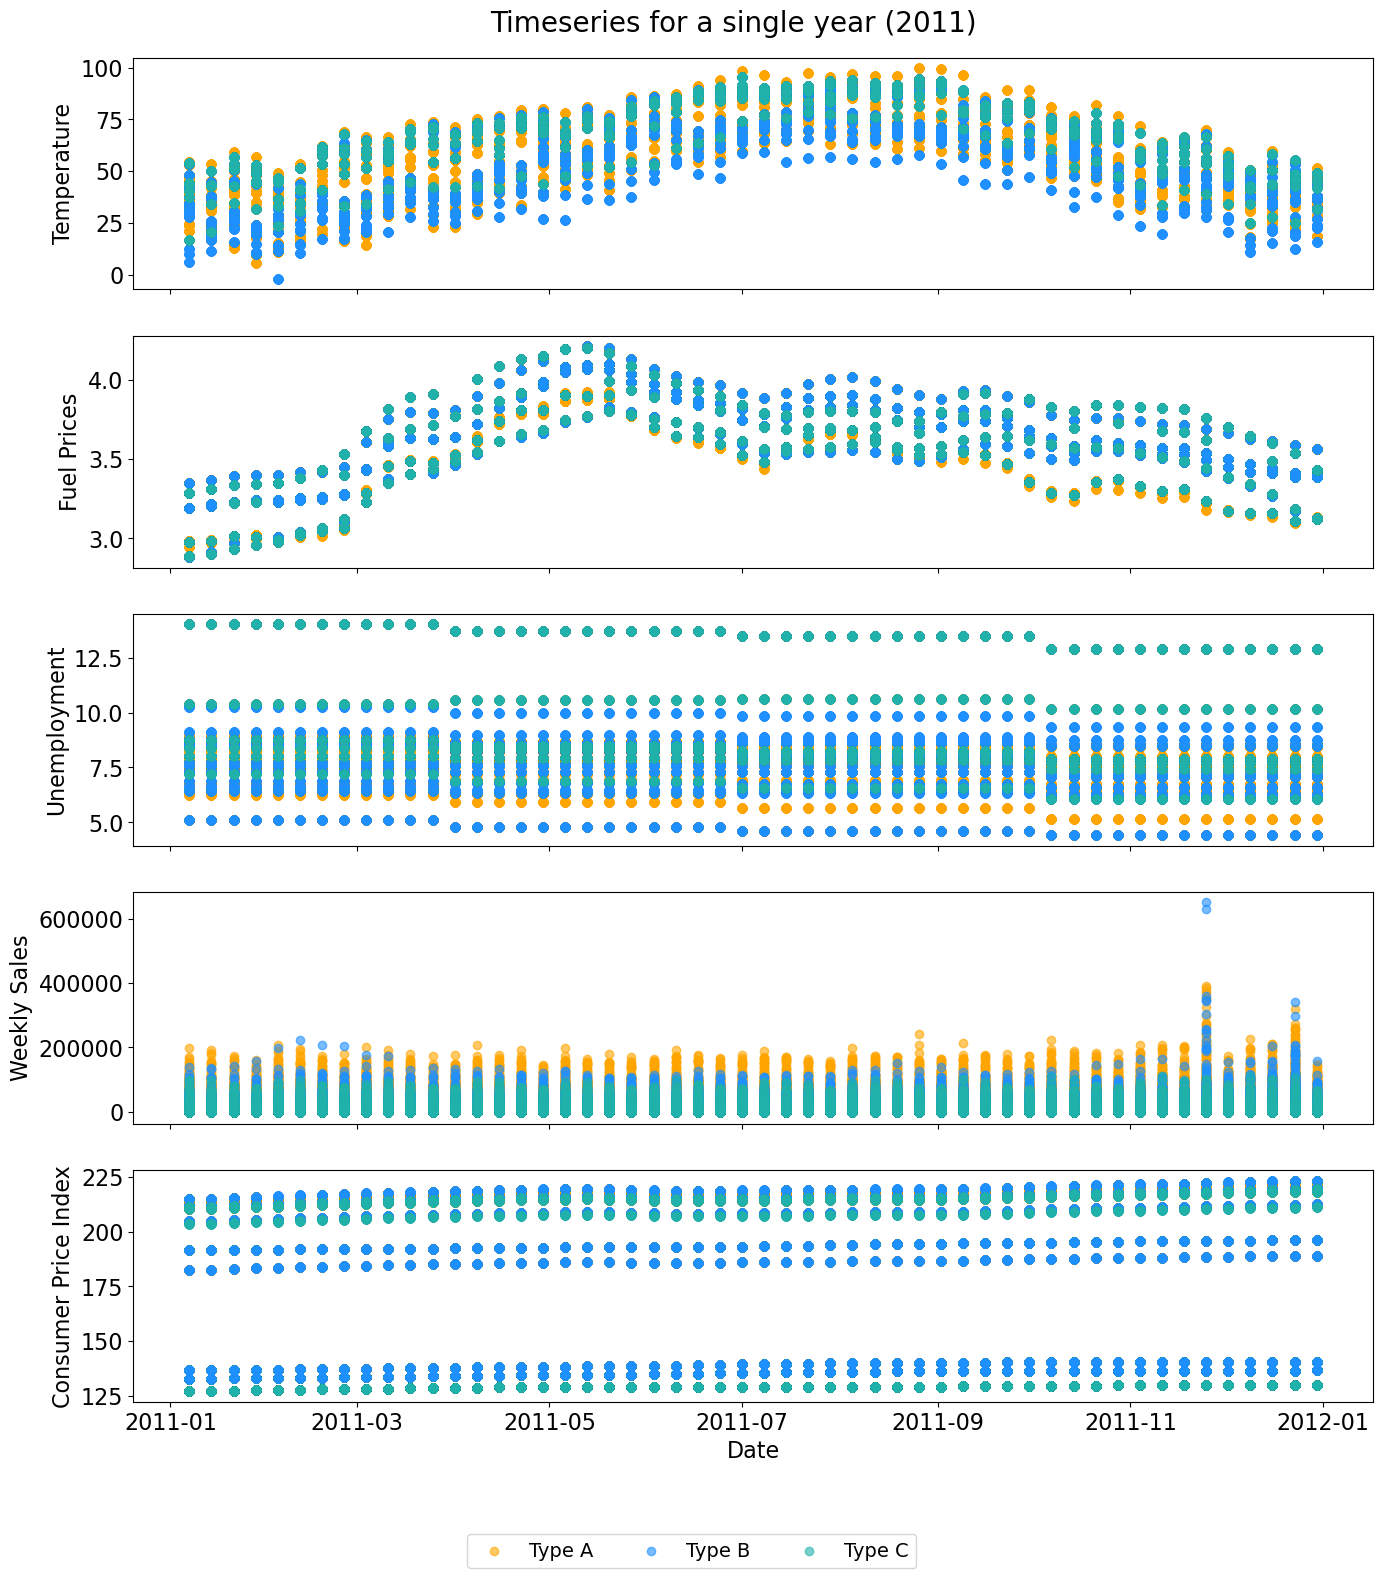

In [23]:
# Lọc các hàng trong DataFrame mergedDF để chỉ lấy các bản ghi có năm là 2011
df_2011 = mergedDF[mergedDF['Date'].dt.year == 2011]

# Tạo một biểu đồ có 5 hàng (nrows=5), với trục x được chia sẻ giữa các biểu đồ
fig, axes = plt.subplots(nrows=5, figsize=(16, 16), sharex=True)

# Tạo một từ điển ánh xạ các loại cửa hàng (Type) với màu sắc
color_mapping = {'A': 'orange', 'B': 'dodgerblue', 'C': 'lightseagreen'}

# Vòng lặp qua từng loại cửa hàng (A, B, C) trong cột Type
for typ in df_2011['Type'].unique():
    filtered_data = df_2011[df_2011['Type'] == typ]
    # Lặp qua từng trục (ax) và từng cột dữ liệu cần vẽ (column)
    # ylabel chứa tên nhãn cho từng cột, giúp tạo nhãn phù hợp trên biểu đồ
    for ax, column, ylabel in zip(axes, 
                                  ['Temperature', 'Fuel_Price', 'Unemployment', 'Weekly_Sales', 'CPI'],
                                  ['Temperature', 'Fuel Prices', 'Unemployment', 'Weekly Sales', 'Consumer Price Index']):
        ax.scatter(filtered_data['Date'], filtered_data[column], 
                   color=color_mapping[typ], alpha=0.6, label=f'Type {typ}')
        ax.set_ylabel(ylabel, fontsize=16)


# Đặt lại nhãn trục y và cài đặt kích cỡ phông chữ
for ax in axes:
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)

axes[-1].set_xlabel('Date', fontsize=16)

# Tạo một chú giải chung (legend) cho toàn bộ biểu đồ.
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(df_2011['Type'].unique()), fontsize=14)

# Điều chỉnh layout
fig.subplots_adjust(top=0.95)  # Adjust top to make room for title

fig.suptitle('Timeseries for a single year (2011)',fontsize=20)

plt.show()

Temperature (Nhiệt độ):
Nhiệt độ có xu hướng tăng dần từ tháng 1 đến giữa năm (tháng 6 - 7) và giảm dần về cuối năm.
Mùa hè (giữa năm) có nhiệt độ cao nhất, mùa đông (đầu và cuối năm) có nhiệt độ thấp nhất.

Fuel Prices (Giá nhiên liệu):
Giá nhiên liệu biến động theo thời gian, đạt đỉnh vào khoảng tháng 5 - tháng 6 và giảm dần về cuối năm.
Biến động giá nhiên liệu có xu hướng đồng đều giữa các loại Type A, B, C.

Unemployment (Tỷ lệ thất nghiệp):
Tỷ lệ thất nghiệp ổn định trong phần lớn thời gian.
Không có xu hướng tăng hoặc giảm rõ rệt.

Weekly Sales (Doanh số bán hàng hàng tuần):
Doanh số bán hàng có sự biến động lớn, với một số đỉnh cao đột biến vào cuối năm (gần dịp lễ hội).
Nhóm Type C có doanh số cao hơn rõ rệt so với Type A và B.

Consumer Price Index (Chỉ số giá tiêu dùng):
CPI gần như ổn định trong suốt năm, không có biến động lớn giữa các nhóm Type A, B, và C.

Tương quan giữa các biến:
Nhiệt độ và giá nhiên liệu dường như có mối quan hệ tương đồng (cùng tăng vào mùa hè và giảm vào mùa đông).
Doanh số bán hàng hàng tuần tăng cao vào cuối năm, có thể liên quan đến các dịp lễ.
Các biến như tỷ lệ thất nghiệp và CPI tương đối ổn định, không chịu ảnh hưởng lớn từ các yếu tố khác.

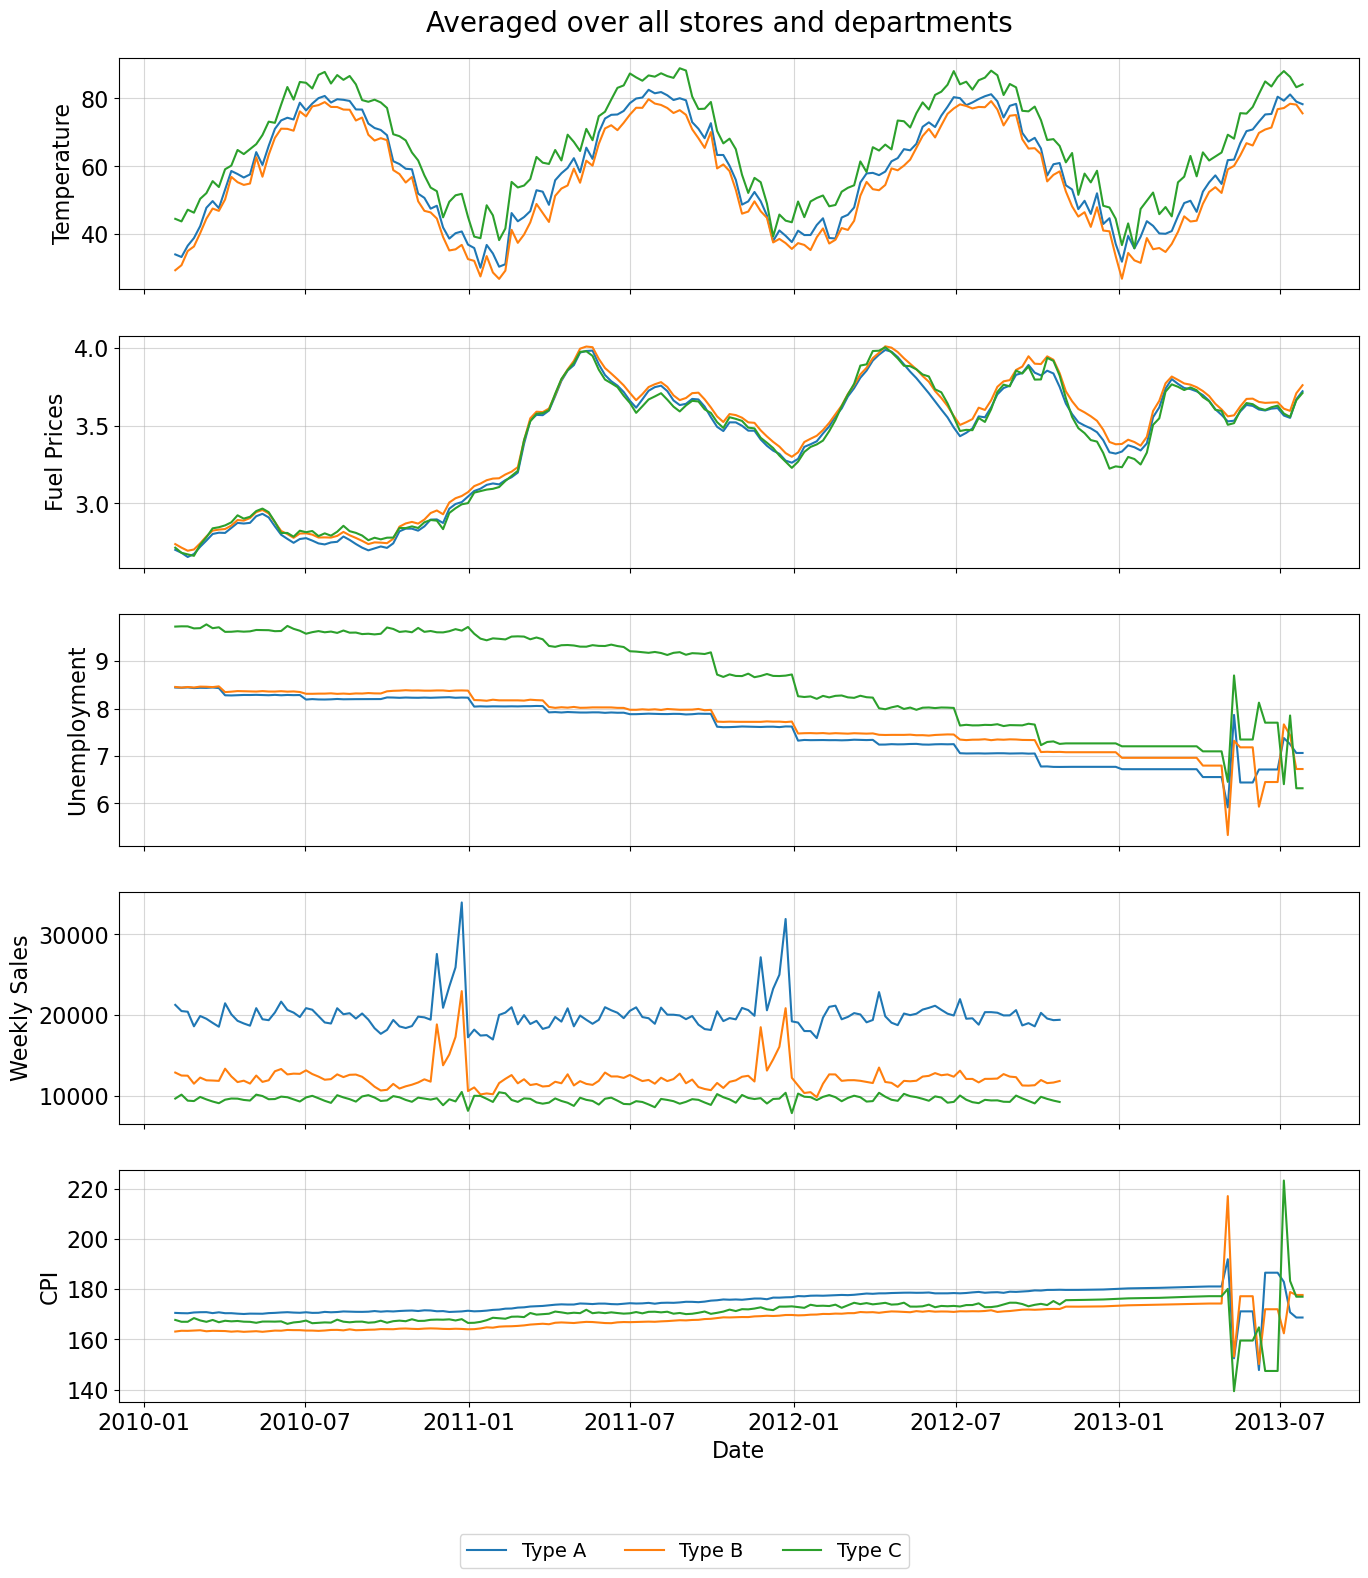

In [26]:
# Nhóm dữ liệu theo cột Type (loại cửa hàng) và Date (ngày), sau đó tính trung bình cho từng nhóm
grouped_data = mergedDF.groupby(['Type', 'Date']).mean()

# Tạo một biểu đồ với 5 hàng (mỗi hàng tương ứng với một biến) và dùng chung trục x (sharex=True)
fig, axes = plt.subplots(nrows=5, figsize=(16, 16), sharex=True)

# Lặp qua từng loại cửa hàng (Type) có trong mergedDF
for typ in mergedDF['Type'].unique():
    axes[0].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Temperature'], label=f'Type {typ}')
    axes[1].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Fuel_Price'], label=f'Type {typ}')
    axes[2].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Unemployment'], label=f'Type {typ}')
    axes[3].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Weekly_Sales'], label=f'Type {typ}')
    axes[4].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['CPI'], label=f'Type {typ}')

# Gán nhãn và  thêm lưới (grid)
y_labels = ['Temperature', 'Fuel Prices', 'Unemployment', 'Weekly Sales', 'CPI']
for ax, label in zip(axes, y_labels):
    ax.set_ylabel(label, fontsize=16)
    ax.grid(True,alpha=0.5)

axes[-1].set_xlabel('Date', fontsize=16)

# Điều chỉnh kích cỡ nhãn trục x và y để dễ đọc hơn
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=16)

# Tạo một chú giải chung (legend) cho toàn bộ biểu đồ
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(mergedDF['Type'].unique()), fontsize=14)

# Điều chỉnh layout
fig.subplots_adjust(top=0.95)  

fig.suptitle('Averaged over all stores and departments',fontsize=20)

plt.show()

Biểu đồ này cung cấp cái nhìn toàn cảnh về xu hướng của các yếu tố kinh tế - xã hội theo thời gian

Temperature (Nhiệt độ):
Nhiệt độ có tính chu kỳ rõ ràng, dao động theo mùa với đỉnh cao vào mùa hè (giữa năm) và thấp nhất vào mùa đông (đầu và cuối năm).
Không có khác biệt lớn giữa ba loại (Type A, B, C)

Fuel Prices (Giá nhiên liệu):
Giá nhiên liệu tăng mạnh vào năm 2011, sau đó giảm dần trong giai đoạn 2012, rồi lại có dấu hiệu tăng lên vào giữa năm 2013
Không có khác biệt lớn giữa ba loại (Type A, B, C)

Unemployment (Tỷ lệ thất nghiệp):
Tỷ lệ thất nghiệp giảm dần trong giai đoạn 2010-2013
Tỷ lệ thất nghiệp ở Type C cao hơn Type A và B trong toàn bộ thời gian

Weekly Sales (Doanh số bán hàng hàng tuần):
Có những đỉnh cao rõ ràng vào cuối năm 2010, 2011, trùng với các mùa lễ hội
Type A luôn có doanh số cao hơn hẳn so với Type B và C. Type B và C có doanh số thấp hơn đáng kể và khá ổn định

CPI (Chỉ số giá tiêu dùng):
CPI tăng dần qua các năm, cho thấy lạm phát hoặc tăng giá hàng hóa tiêu dùng
Type A có CPI cao hơn Type B và C trong toàn bộ giai đoạn

Tương quan giữa các biến:  
Nhiệt độ và Giá nhiên liệu: Có xu hướng tương quan, khi nhiệt độ tăng vào mùa hè thì giá nhiên liệu cũng có xu hướng tăng  
Doanh số bán hàng và thời điểm: Các đỉnh cao của doanh số rơi vào các dịp lễ cuối năm, cho thấy sự tác động của mùa vụ và các sự kiện đặc biệt  
Tỷ lệ thất nghiệp và Doanh số bán hàng: Nhóm Type C có tỷ lệ thất nghiệp cao và doanh số thấp hơn, cho thấy thất nghiệp có thể là nguyên nhân dẫn đến giảm tiêu dùng và doanh số bán hàng

# Phân tích doanh thu theo từng phòng ban tại mỗi cửa hàng


In [35]:
print('Number of Stores = ',len(mergedDF['Store'].dropna().unique()))
print('Number of Departments = ',len(mergedDF['Dept'].dropna().unique()))

Number of Stores =  45
Number of Departments =  81


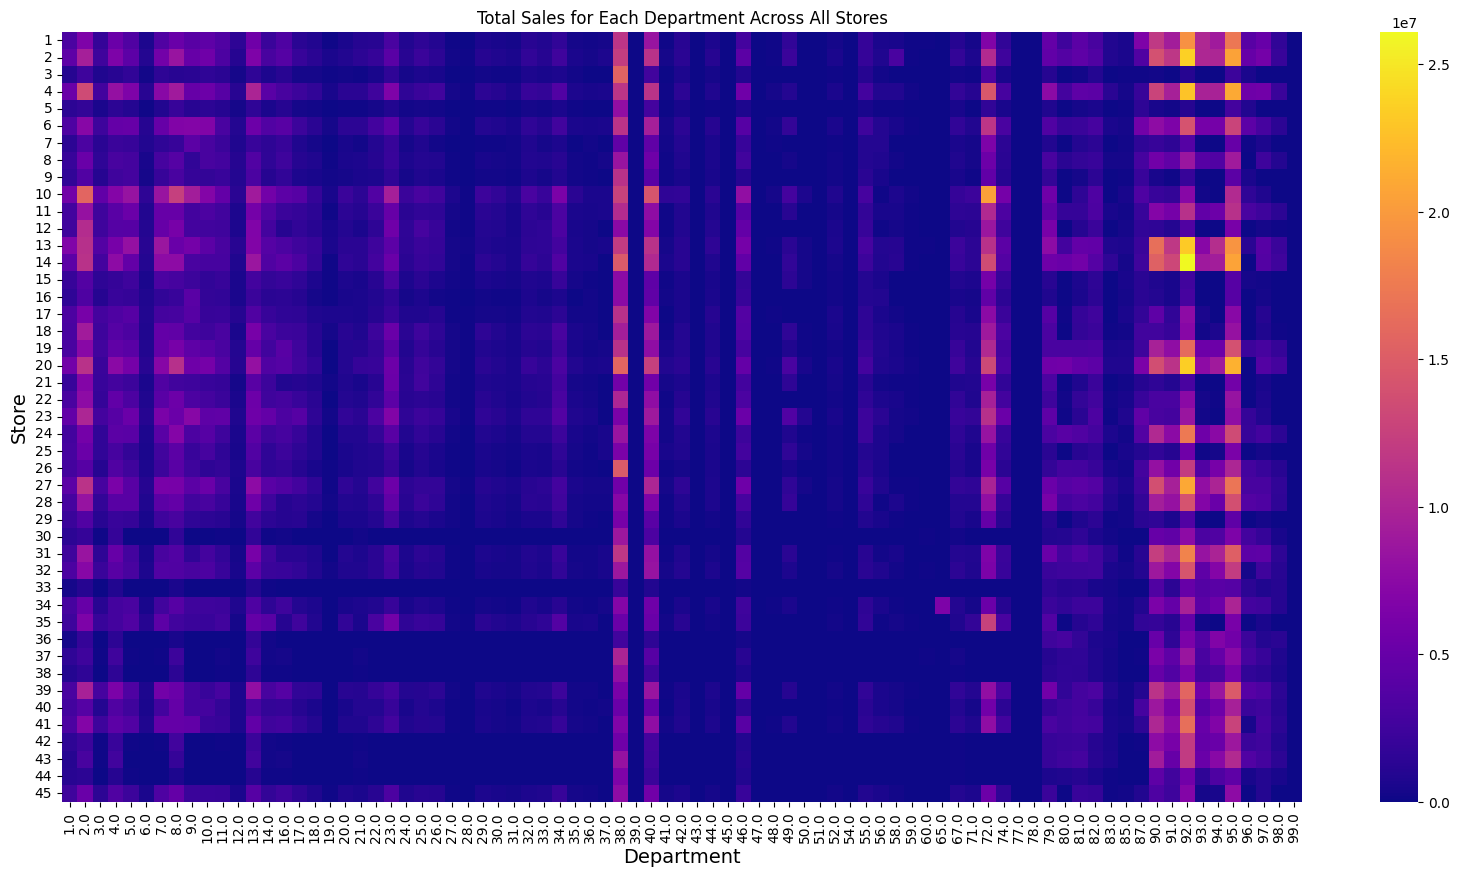

In [151]:
# Tóm tắt doanh thu theo cửa hàng và phòng ban
sales_summary = mergedDF.groupby(['Store', 'Dept'])['Weekly_Sales'].sum().unstack()  

# Điền giá trị NaN bằng 0 (do không có doanh thu cho các cặp cửa hàng-phòng ban đó)
sales_summary.fillna(0, inplace=True)  # Thay thế các giá trị NaN bằng 0, có nghĩa là không có doanh thu (0$).

# Vẽ heatmap để hiển thị tổng doanh thu theo cửa hàng và phòng ban
plt.figure(figsize=(20, 10))  # Tạo một hình vẽ có kích thước 20x10 inch
sns.heatmap(sales_summary, annot=False, cmap='plasma')  # Vẽ heatmap với màu sắc từ bảng màu 'plasma', không hiển thị các giá trị trong ô (annot=False)
plt.title('Total Sales for Each Department Across All Stores')  # Tiêu đề biểu đồ
plt.xlabel('Department', fontsize=14)  # Nhãn trục X là "Phòng ban"
plt.ylabel('Store', fontsize=14)  # Nhãn trục Y là "Cửa hàng"
plt.show()  # Hiển thị biểu đồ heatmap




Biểu đồ heatmap thể hiện tổng doanh thu của mỗi phòng ban tại các cửa hàng.
Màu sắc sáng hơn biểu thị doanh thu cao, trong khi màu tối hơn cho thấy doanh thu thấp hoặc không có doanh thu (được điền bằng 0).
Biểu đồ này giúp dễ dàng nhận diện các cửa hàng và phòng ban có doanh thu cao hoặc cần cải thiện.

### Những cửa hàng nào đang hoạt động tốt nhất tính đến thời điểm hiện tại?

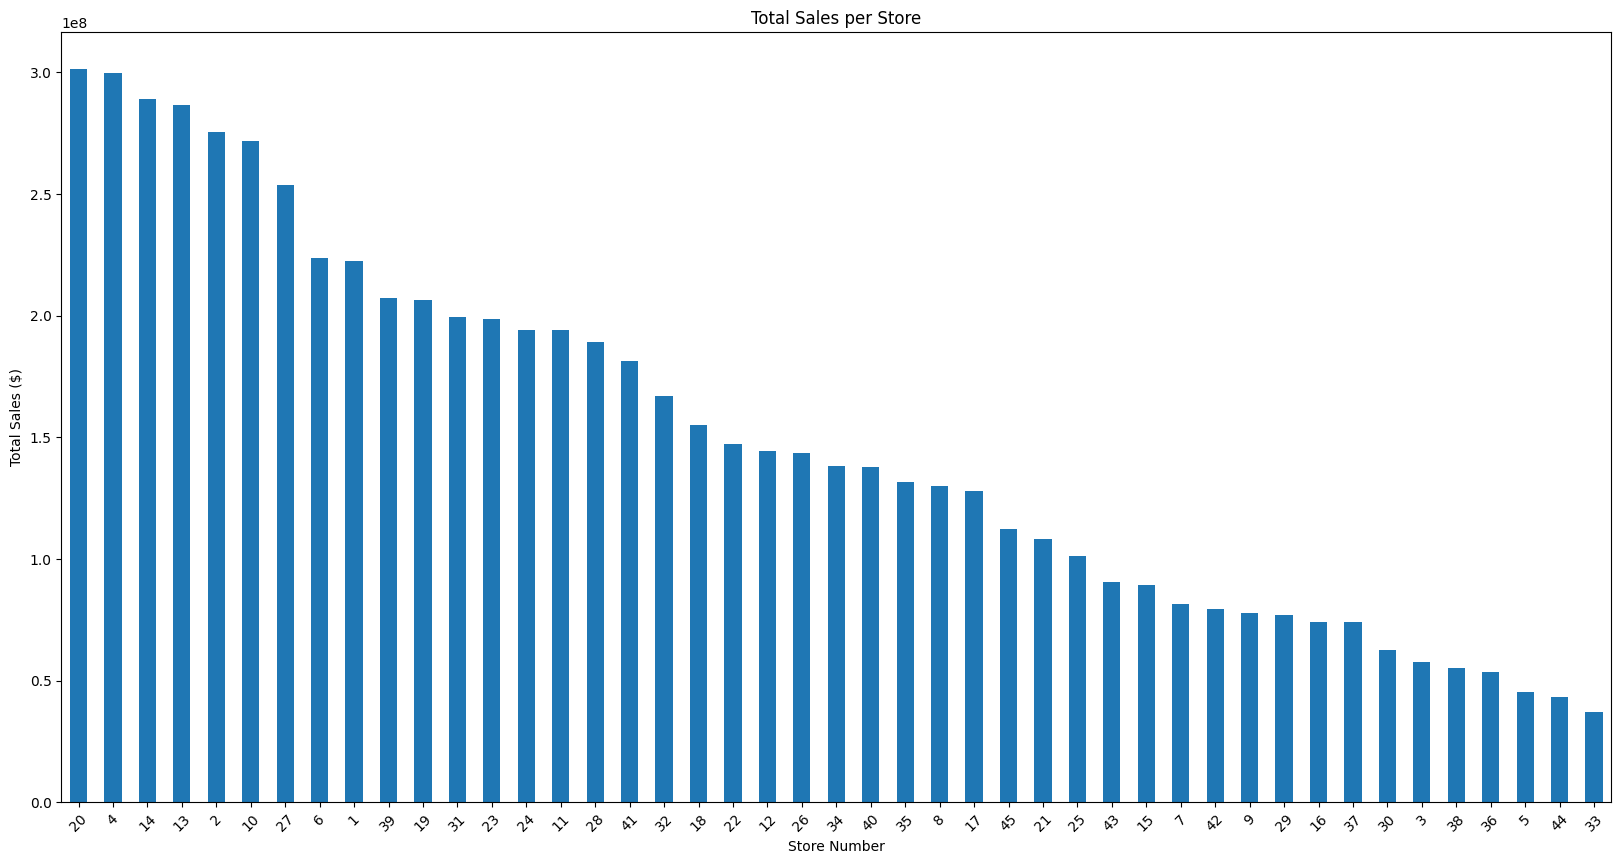

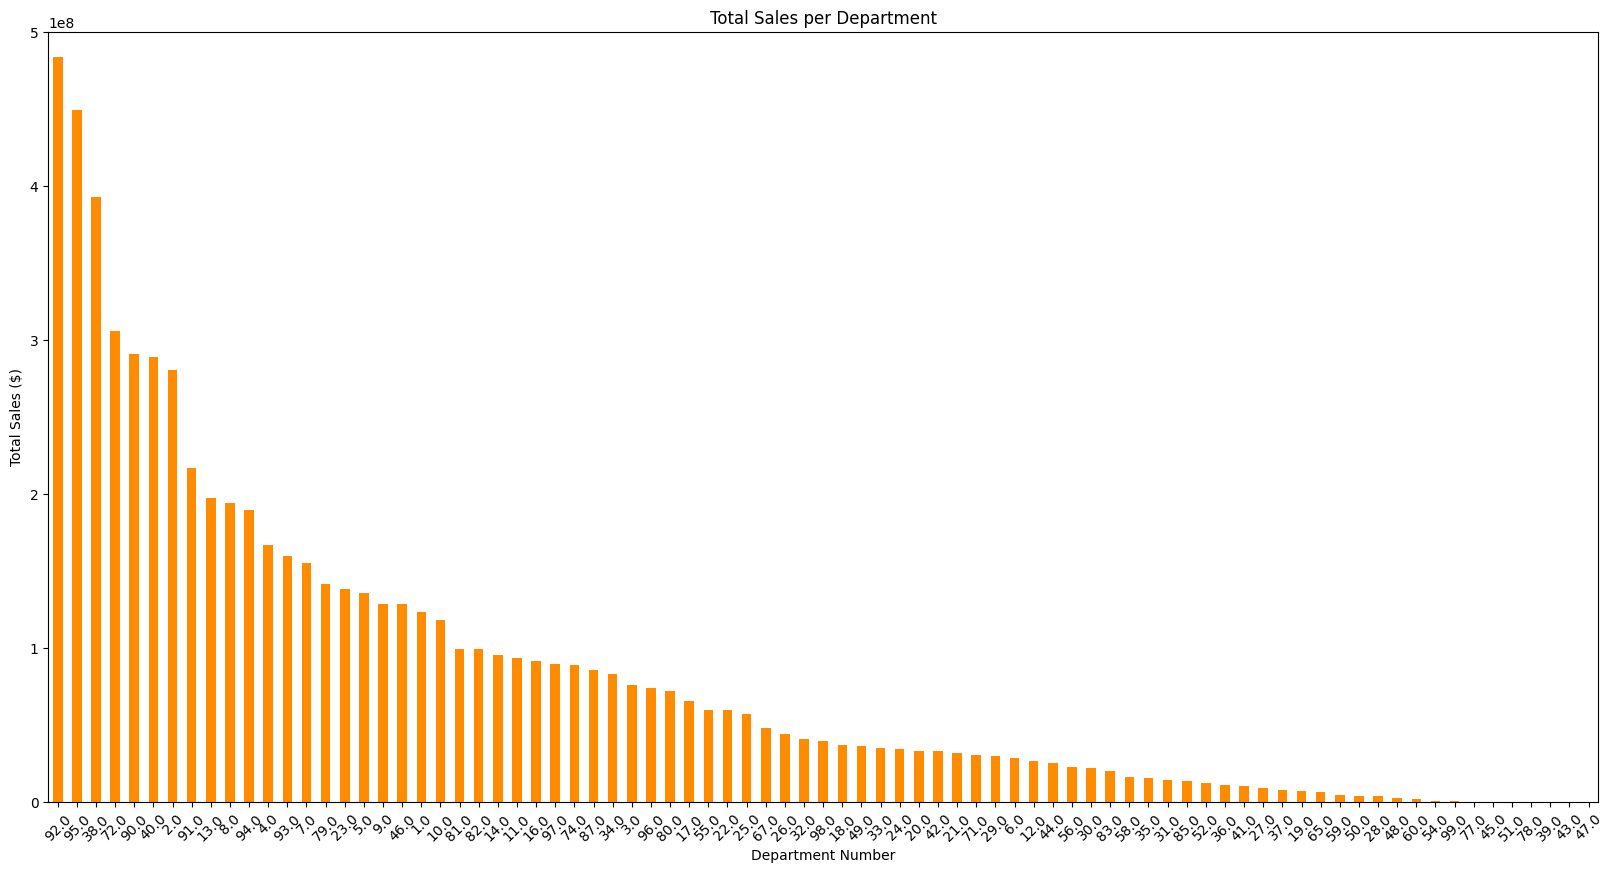

In [152]:
# Tổng hợp doanh thu theo từng cửa hàng
totalSales_byStore = mergedDF.groupby('Store')['Weekly_Sales'].sum()  # Nhóm dữ liệu theo cửa hàng và tính tổng doanh thu hàng tuần

# Tổng hợp doanh thu theo từng phòng ban
totalSales_byDept = mergedDF.groupby('Dept')['Weekly_Sales'].sum()  # Nhóm dữ liệu theo phòng ban và tính tổng doanh thu hàng tuần

# Sắp xếp các cửa hàng theo doanh thu tổng từ cao đến thấp
rankedStores = totalSales_byStore.sort_values(ascending=False)  # Sắp xếp doanh thu của các cửa hàng từ cao đến thấp

# Sắp xếp các phòng ban theo doanh thu tổng từ cao đến thấp
rankedDepts = totalSales_byDept.sort_values(ascending=False)  # Sắp xếp doanh thu của các phòng ban từ cao đến thấp

# Vẽ biểu đồ cột cho doanh thu từng cửa hàng
plt.figure(figsize=(20, 10))  # Đặt kích thước của biểu đồ là 20x10 inch
rankedStores.plot(kind='bar')  # Vẽ biểu đồ cột với dữ liệu sắp xếp từ cao đến thấp
plt.title('Total Sales per Store')  # Tiêu đề biểu đồ
plt.xlabel('Store Number')  # Nhãn cho trục X là "Số cửa hàng"
plt.ylabel('Total Sales ($)')  # Nhãn cho trục Y là "Tổng doanh thu ($)"
plt.xticks(rotation=45)  # Xoay nhãn trục X 45 độ để dễ đọc hơn

# Vẽ biểu đồ cột cho doanh thu từng phòng ban
plt.figure(figsize=(20, 10))  # Đặt kích thước của biểu đồ là 20x10 inch
rankedDepts.plot(kind='bar', color='darkorange')  # Vẽ biểu đồ cột cho doanh thu các phòng ban, màu cam tối
plt.title('Total Sales per Department')  # Tiêu đề biểu đồ
plt.xlabel('Department Number')  # Nhãn cho trục X là "Số phòng ban"
plt.ylabel('Total Sales ($)')  # Nhãn cho trục Y là "Tổng doanh thu ($)"
plt.xticks(rotation=45)  # Xoay nhãn trục X 45 độ
plt.ylim([0, 5e8])  # Đặt giới hạn trục Y từ 0 đến 500 triệu để dễ nhìn hơn

# Hiển thị biểu đồ
plt.show()  # Hiển thị các biểu đồ đã vẽ


Biểu đồ cột cho thấy doanh thu tổng của từng cửa hàng và phòng ban, giúp nhận diện các cửa hàng và phòng ban có doanh thu cao nhất. 
Việc sắp xếp doanh thu từ cao đến thấp giúp dễ dàng so sánh và phát hiện các cửa hàng hoặc phòng ban cần cải thiện doanh thu.
Giới hạn trục Y giúp làm rõ sự khác biệt về doanh thu giữa các cửa hàng và phòng ban.
Qua biểu đồ trên có thể nhận thấy rằng cửa hàng số 20 và phòng ban 92 có doanh thu cao nhất, cửa hàng số 33 và phòng ban 47 có doanh thu thấp nhất.

In [153]:
print('Highest Performing Store  = Store #',rankedStores.index[0])
print('Highest Performing Department  = Department #',int(rankedDepts.index[0]))

Highest Performing Store  = Store # 20
Highest Performing Department  = Department # 92


# Những tác động của việc giảm giá (Markdowns) trong các kỳ nghỉ lễ là gì?

In [154]:
# lấy bản sao của dataset chỉ chứa các bản ghi liên quan đến ngày lễ
holidaysDF = mergedDF[mergedDF['IsHoliday']==True]
holidaysDF

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
73          1 2010-02-12        38.51       2.548       0.00       0.00   
74          1 2010-02-12        38.51       2.548       0.00       0.00   
75          1 2010-02-12        38.51       2.548       0.00       0.00   
76          1 2010-02-12        38.51       2.548       0.00       0.00   
77          1 2010-02-12        38.51       2.548       0.00       0.00   
...       ...        ...          ...         ...        ...        ...   
422815     45 2012-09-07        75.70       3.911   11024.45      12.80   
422816     45 2012-09-07        75.70       3.911   11024.45      12.80   
423289     45 2012-11-23        43.08       3.748    1005.79       0.00   
423294     45 2012-12-28        35.96       3.563   12751.77   24656.74   
423300     45 2013-02-08        28.99       3.753   53311.88     531.33   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
73           0.00       0.00       0.00  211.242170         8.106       True   
74           0.00       0.00       0.00  211.242170         8.106       True   
75           0.00       0.00       0.00  211.242170         8.106       True   
76           0.00       0.00       0.00  211.242170         8.106       True   
77           0.00       0.00       0.00  211.242170         8.106       True   
...           ...        ...        ...         ...           ...        ...   
422815      52.63    1854.77    2055.70  191.577676         8.684       True   
422816      52.63    1854.77    2055.70  191.577676         8.684       True   
423289   72542.01     484.70     620.12  192.283032         8.667       True   
423294     230.07      31.46    1654.14  192.559264         8.667       True   
423300      78.26   24823.94    3233.44  192.897089         8.625       True   

        Dept  Weekly_Sales Type    Size  
73       1.0      46039.49    A  151315  
74       2.0      44682.74    A  151315  
75       3.0      10887.84    A  151315  
76       4.0      35351.21    A  151315  
77       5.0      29620.81    A  151315  
...      ...           ...  ...     ...  
422815  97.0       7426.19    B  118221  
422816  98.0        352.44    B  118221  
423289   NaN           NaN    B  118221  
423294   NaN           NaN    B  118221  
423300   NaN           NaN    B  118221  

[29796 rows x 16 columns]

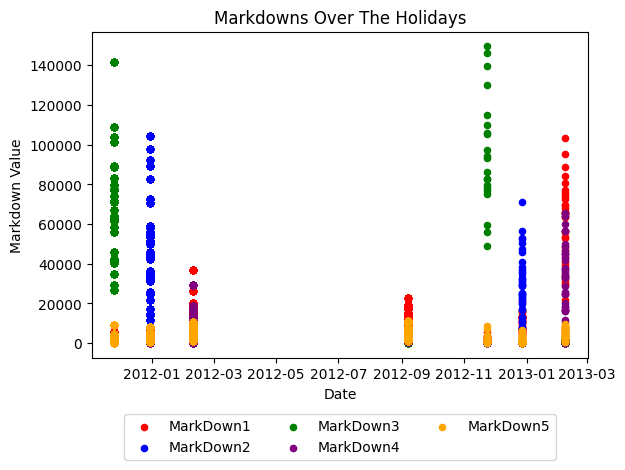

In [155]:
# Lấy bản sao của dataset chỉ chứa các bản ghi liên quan đến ngày lễ
holidaysDf = mergedDF[mergedDF['IsHoliday'] == True].copy()

# Loại bỏ các giá trị bằng 0 trong các cột MarkDown1 đến MarkDown5
columns_to_filter = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in columns_to_filter:
    holidaysDf[col] = holidaysDf[col].replace(0, pd.NA)  # Thay 0 bằng NaN
    holidaysDf = holidaysDf[holidaysDf[col].notna()]  # Loại bỏ các hàng có giá trị NaN

# Tạo một hình và trục (axes) cho biểu đồ
fig, ax = plt.subplots()

# Vẽ từng series markdown dưới dạng scatter plot với các màu sắc khác nhau trên cùng một trục
holidaysDf.plot.scatter(x="Date", y="MarkDown1", ax=ax, color='red', label='MarkDown1')
holidaysDf.plot.scatter(x="Date", y="MarkDown2", ax=ax, color='blue', label='MarkDown2')
holidaysDf.plot.scatter(x="Date", y="MarkDown3", ax=ax, color='green', label='MarkDown3')
holidaysDf.plot.scatter(x="Date", y="MarkDown4", ax=ax, color='purple', label='MarkDown4')
holidaysDf.plot.scatter(x="Date", y="MarkDown5", ax=ax, color='orange', label='MarkDown5')

# Tùy chọn: thêm tiêu đề và nhãn cho trục x và trục y
ax.set_title('Markdowns Over The Holidays')  # Tiêu đề biểu đồ
ax.set_xlabel('Date')  # Nhãn cho trục x
ax.set_ylabel('Markdown Value')  # Nhãn cho trục y

# Thêm chú thích (legend) dưới biểu đồ
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # Vị trí chú thích dưới cùng

# Điều chỉnh bố cục để tạo không gian cho chú thích
plt.subplots_adjust(bottom=0.2)

# Hiển thị biểu đồ
plt.show()



Giảm giá chỉ được áp dụng vào những ngày cụ thể trong kỳ nghỉ lễ, và được thể hiện bằng các điểm phân tán vào những ngày nhất định. 
Điều này giúp nhận diện các thời điểm giảm giá trong kỳ nghỉ lễ, tạo cơ sở để phân tích tác động của markdown đối với doanh số bán hàng.

In [156]:
# Danh sách các cột markdown
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Lọc các hàng mà có bất kỳ cột markdown nào lớn hơn 0
holidaysMarkDownDF = holidaysDF[holidaysDF[markdown_columns].gt(0).any(axis=1)]

# Lọc các hàng mà tất cả các cột markdown đều bằng 0
holidaysNoMarkDownDF = holidaysDF[holidaysDF[markdown_columns].eq(0).all(axis=1)]


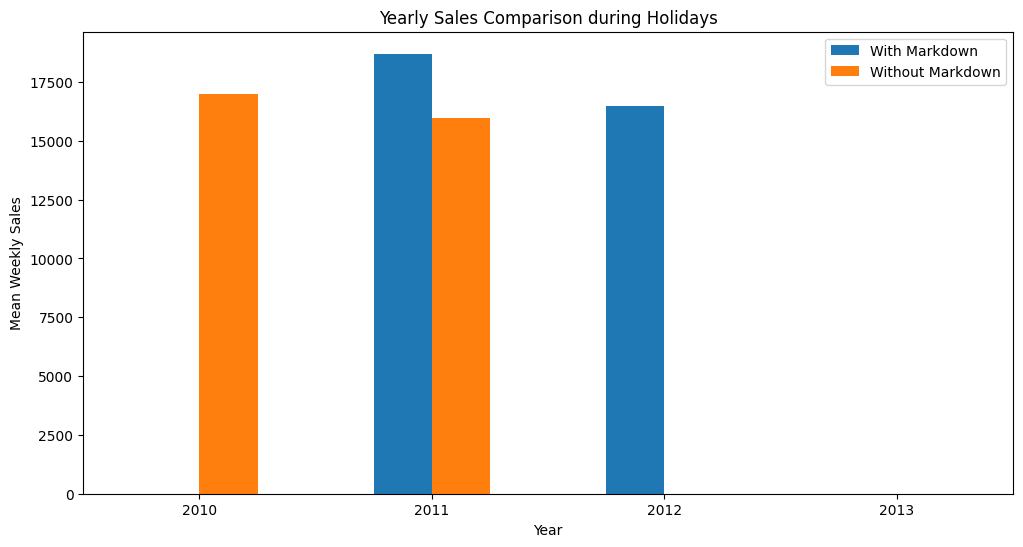

In [157]:
# Trích xuất năm từ cột 'Date' cho cả hai DataFrame
holidaysMarkDownDF['Year'] = holidaysMarkDownDF['Date'].dt.year
holidaysNoMarkDownDF['Year'] = holidaysNoMarkDownDF['Date'].dt.year

# Tính tổng doanh số hàng tuần (Weekly_Sales) theo từng năm
sales_markdown = holidaysMarkDownDF.groupby('Year')['Weekly_Sales'].mean()
sales_no_markdown = holidaysNoMarkDownDF.groupby('Year')['Weekly_Sales'].mean()

# Kết hợp dữ liệu vào một DataFrame duy nhất để vẽ đồ thị
combined_sales = pd.DataFrame({'With Markdown': sales_markdown, 'Without Markdown': sales_no_markdown})

# Vẽ đồ thị thanh so sánh doanh số hàng năm
combined_sales.plot(kind='bar', figsize=(12, 6))

# Thêm tiêu đề cho đồ thị
plt.title('Yearly Sales Comparison during Holidays')

# Đặt nhãn cho trục x và trục y
plt.xlabel('Year')  
plt.ylabel('Mean Weekly Sales') 

# Đặt các nhãn năm trên trục x nằm ngang để dễ đọc
plt.xticks(rotation=0)  

# Hiển thị đồ thị
plt.show()


Biểu đồ cho thấy việc giảm giá góp phần làm tăng doanh số, đặc biệt là trong các kỳ nghỉ lễ.
Làm nổi bật cách doanh số hàng tuần thay đổi theo thời gian và nhấn mạnh tác động tích cực của việc giảm giá đối với doanh số trong các mùa cao điểm của kỳ nghỉ lễ.

In [158]:
# Nhóm doanh số theo ngày và tính giá trị trung bình của 'Weekly_Sales'
WeeklyMeanSales = mergedDF.groupby('Date')['Weekly_Sales'].mean()

# Nhóm markdown theo ngày và tính giá trị trung bình cho từng loại markdown
WeeklyMeanMarkDown = [mergedDF.groupby('Date')['MarkDown1'].mean(),
                     mergedDF.groupby('Date')['MarkDown2'].mean(),
                     mergedDF.groupby('Date')['MarkDown3'].mean(),
                     mergedDF.groupby('Date')['MarkDown4'].mean(),
                     mergedDF.groupby('Date')['MarkDown5'].mean()]

# Thay thế giá trị 0 bằng NaN trong dữ liệu 'Weekly_Sales'
WeeklyMeanSales = WeeklyMeanSales.replace(0, np.nan)

# Thay thế giá trị 0 bằng NaN trong mỗi chuỗi markdown
WeeklyMeanMarkDown = [md.replace(0, np.nan) for md in WeeklyMeanMarkDown]


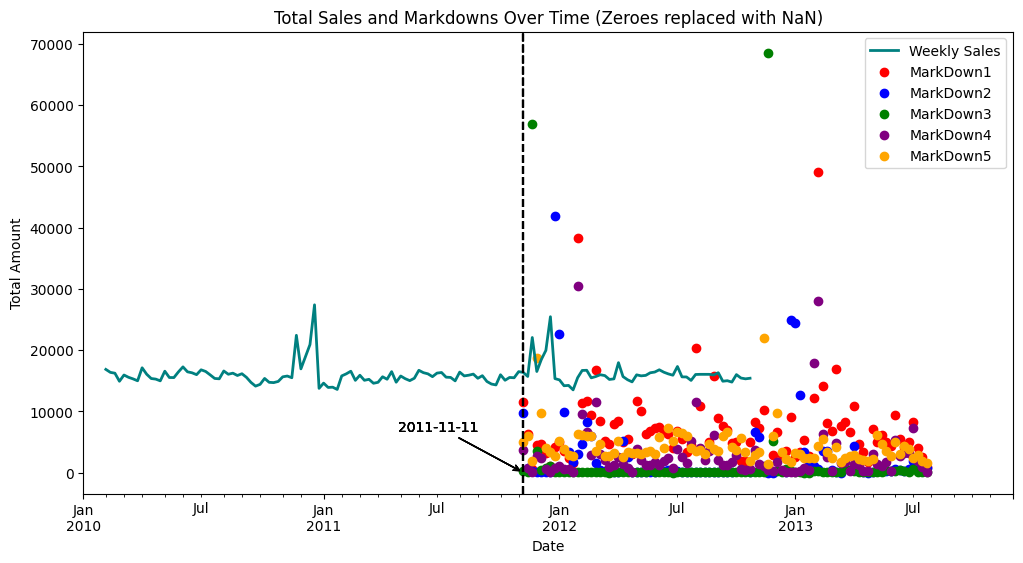

In [159]:


# Tạo một hình vẽ với kích thước 12x6 inches
plt.figure(figsize=(12, 6))

# Vẽ đồ thị cho doanh số hàng tuần (Weekly Sales)
WeeklyMeanSales.plot(label='Weekly Sales', color='teal', linewidth=2)

# Định nghĩa màu sắc cho mỗi loại markdown
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Vẽ đồ thị cho từng loại markdown và vẽ đường thẳng đứng với chú thích
for i, md in enumerate(WeeklyMeanMarkDown):
    # Tìm ngày đầu tiên có giá trị hợp lệ (không phải NaN) cho markdown này
    start_date = md.first_valid_index()
    
    # Vẽ markdown dưới dạng điểm (scatter)
    plt.scatter(md.index, md, label=f'MarkDown{i+1}', color=colors[i])
    
    # Vẽ đường thẳng đứng tại ngày đầu tiên có giá trị hợp lệ
    plt.axvline(x=start_date, color='black', linestyle='--')

    # Thêm chú thích cho ngày bắt đầu
    plt.annotate(start_date.strftime('%Y-%m-%d'), 
                 xy=(start_date, 0), 
                 xycoords='data', 
                 xytext=(-90, 30), 
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                 color='black')

# Đặt tiêu đề cho đồ thị
plt.title('Total Sales and Markdowns Over Time (Zeroes replaced with NaN)')
plt.xlabel('Date')  # Nhãn trục x (Ngày)
plt.ylabel('Total Amount')  # Nhãn trục y (Tổng số tiền)

# Đặt giới hạn cho trục x từ năm 2010 đến cuối năm 2013
plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2013-12-01'))

# Hiển thị legend (chú thích)
plt.legend()

# Hiển thị đồ thị
plt.show()


Biểu đồ cho thấy Weekly Sales theo thời gian và làm nổi bật việc áp dụng giảm giá bắt đầu từ ngày 11 tháng 11 năm 2011. 
Mỗi lần giảm giá được biểu thị bằng các điểm phân tán, với các đường thẳng đứng đứt nét đánh dấu ngày bắt đầu. 
Các chú thích hiển thị ngày chính xác, làm nổi bật thời điểm áp dụng markdown để hỗ trợ phân tích doanh số bán hàng trước và sau markdown, từ tháng 1 năm 2010 đến tháng 12 năm 2013.

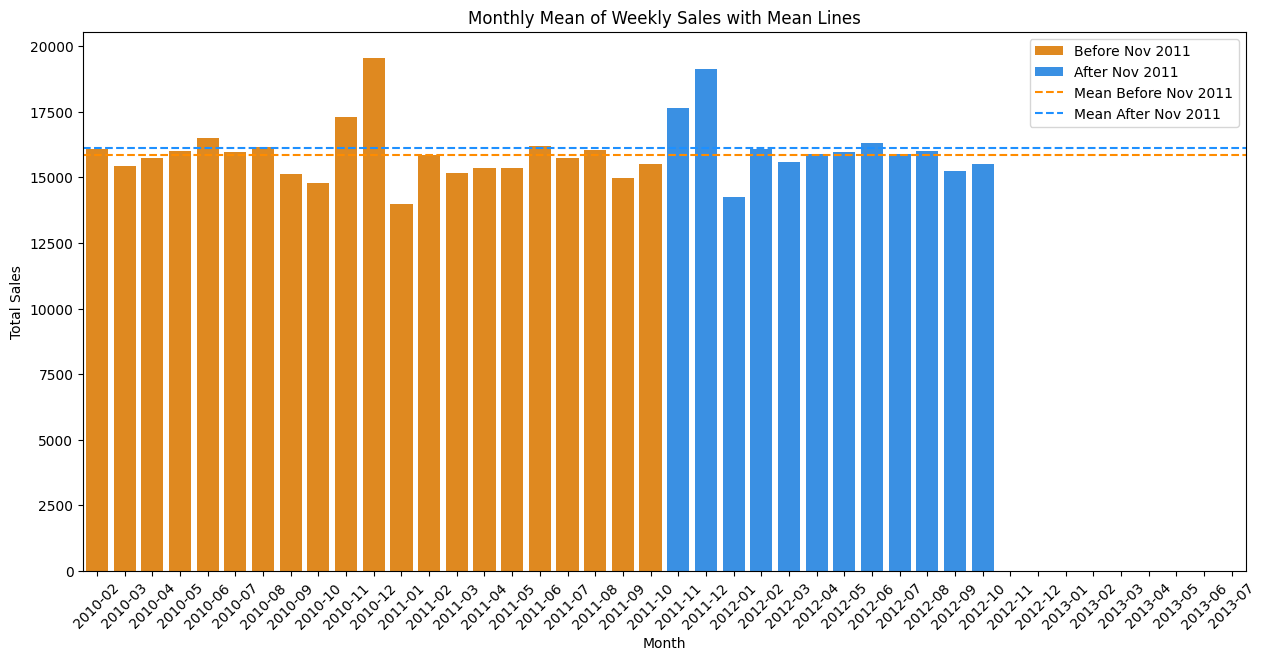

In [160]:
# Lấy mẫu lại và tổng hợp doanh số hàng tháng
monthlySales = mergedDF.resample('M', on='Date')['Weekly_Sales'].mean().reset_index()
 
# Thêm cột mới để phân loại dữ liệu theo ngày (Phân loại doanh số thành hai giai đoạn: trước và sau khi markdown được triển khai.)
monthlySales['Period'] = monthlySales['Date'].apply(lambda x: 'Before Nov 2011' if x < pd.Timestamp('2011-11-01') else 'After Nov 2011')

# Chuyển đổi cột Date thành kiểu period với đơn vị tháng (M).
monthlySales['Date'] = monthlySales['Date'].dt.to_period('M')

# Vẽ đồ thị với Seaborn, hiển thị doanh số hàng tháng, phân biệt hai giai đoạn bằng màu sắc.
plt.figure(figsize=(15, 7))
sns.barplot(data=monthlySales, x='Date', y='Weekly_Sales', hue='Period', palette=['darkorange', 'dodgerblue'])

# Tính doanh số trung bình hàng tuần cho từng giai đoạn
mean_before_nov2011 = monthlySales[monthlySales['Period'] == 'Before Nov 2011']['Weekly_Sales'].mean()
mean_after_nov2011 = monthlySales[monthlySales['Period'] == 'After Nov 2011']['Weekly_Sales'].mean()

#So sánh rõ ràng mức doanh số trung bình giữa hai giai đoạn.
plt.axhline(mean_before_nov2011, color='darkorange', linestyle='--', label='Mean Before Nov 2011')
plt.axhline(mean_after_nov2011, color='dodgerblue', linestyle='--', label='Mean After Nov 2011')

plt.title('Monthly Mean of Weekly Sales with Mean Lines')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.legend()

plt.show()

Vậy, doanh số đã cho thấy sự gia tăng nhẹ sau khi các chương trình giảm giá được triển khai

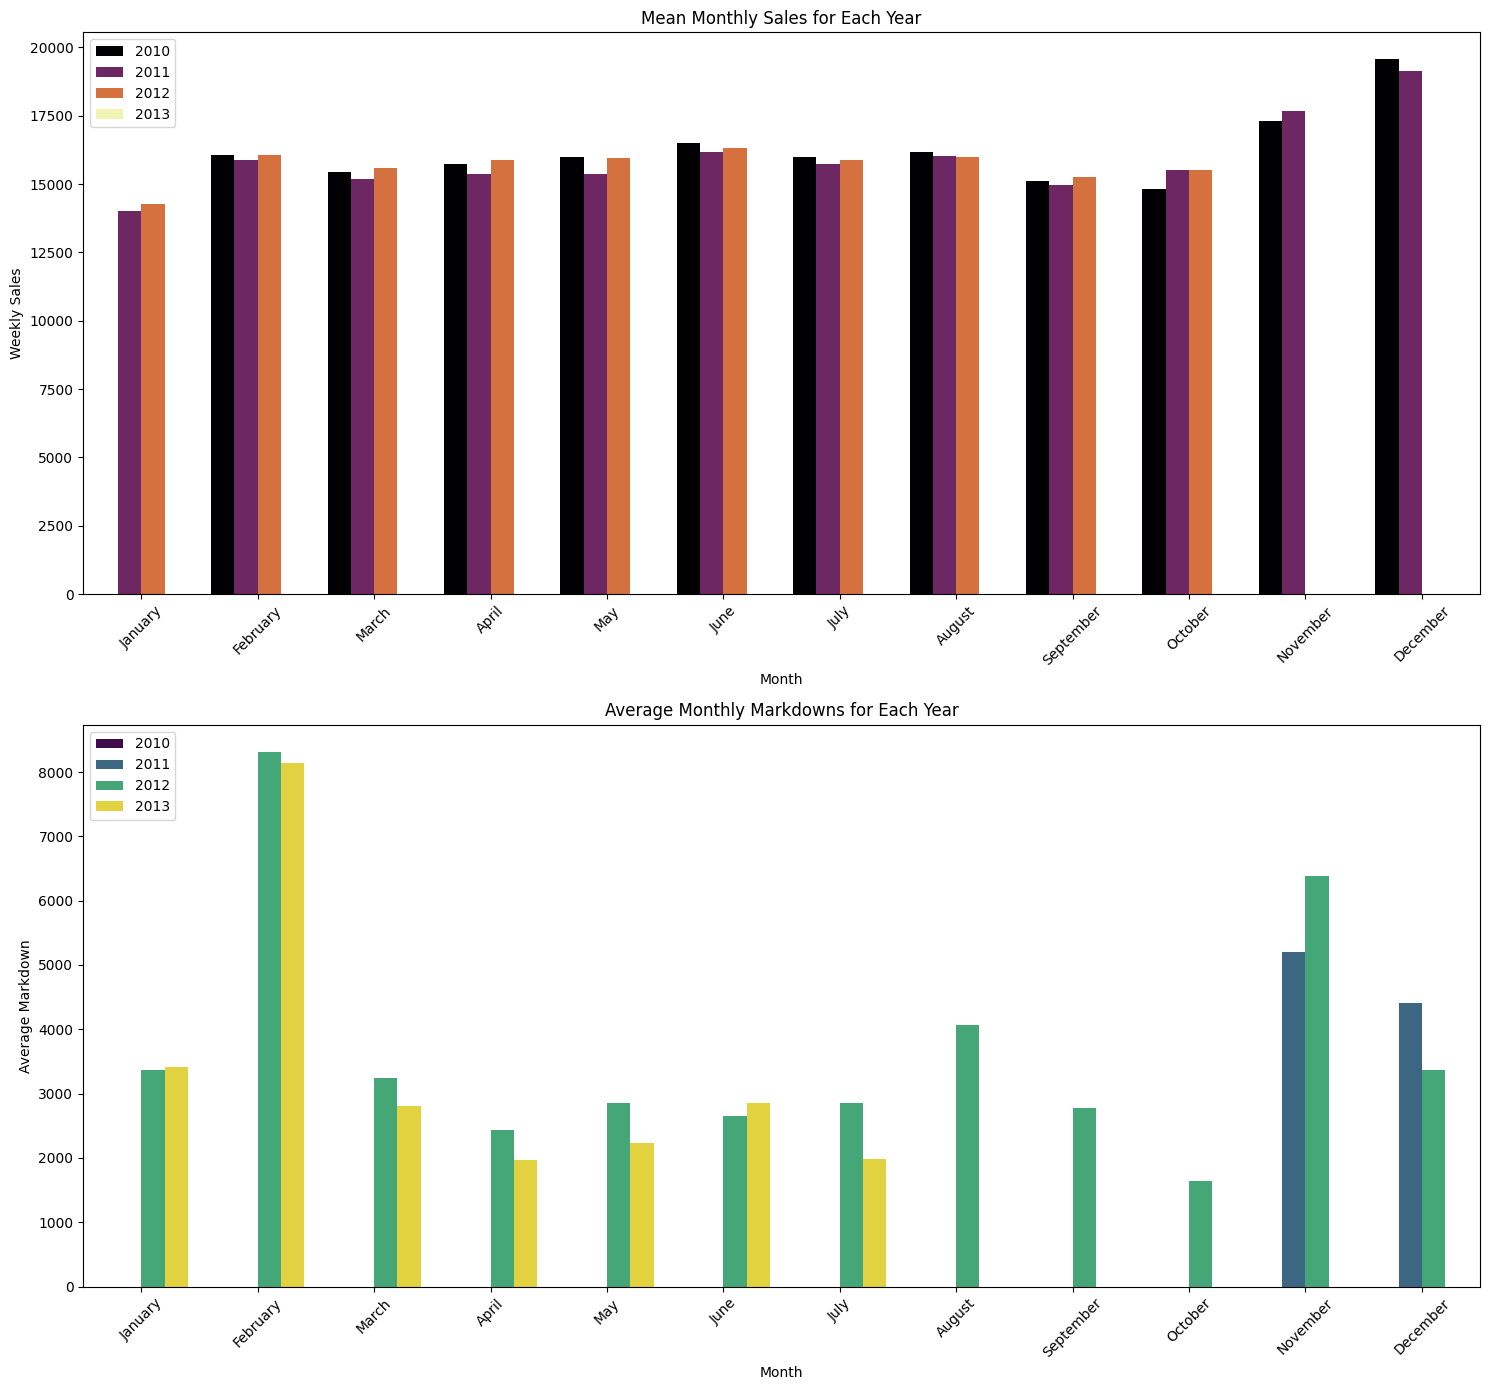

In [161]:
# Trích xuất năm và tháng từ cột 'Date'
mergedDF['Year'] = mergedDF['Date'].dt.year
mergedDF['Month'] = mergedDF['Date'].dt.month_name()

# Nhóm dữ liệu theo năm và tháng, tính giá trị trung bình của doanh số và các MarkDown
grouped = mergedDF.groupby(['Year', 'Month'])
monthly_data = grouped[['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean().reset_index()

# Thêm cột cho MarkDown trung bình từ các MarkDown1 đến MarkDown5
monthly_data['AvgMarkDown'] = monthly_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean(axis=1)

# Định nghĩa thứ tự đúng cho các tháng trong năm
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Chuyển 'Month' thành kiểu dữ liệu thứ tự có định nghĩa sẵn (categorical type) theo thứ tự các tháng đã định nghĩa
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=months_order, ordered=True)

# Sắp xếp dữ liệu theo thứ tự năm và tháng
monthly_data.sort_values(by=['Year', 'Month'], inplace=True)

# Tạo một biểu đồ gồm hai đồ thị con (subplot), với một biểu đồ nằm trên và một biểu đồ nằm dưới
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 14))

# Vẽ biểu đồ cột (barplot) cho dữ liệu doanh số trên biểu đồ con đầu tiên
sns.barplot(data=monthly_data, x='Month', y='Weekly_Sales', hue='Year', palette='inferno', ax=ax1)
ax1.set_title('Mean Monthly Sales for Each Year')  # Đặt tiêu đề cho biểu đồ đầu tiên
ax1.set_xlabel('Month')  # Đặt nhãn trục x
ax1.set_ylabel('Weekly Sales')  # Đặt nhãn trục y
ax1.legend(loc='upper left')  # Đặt vị trí của chú thích
ax1.tick_params(axis='x', rotation=45)  # Xoay nhãn trục x để dễ đọc

# Vẽ biểu đồ cột cho dữ liệu giảm giá trung bình trên biểu đồ con thứ hai
sns.barplot(data=monthly_data, x='Month', y='AvgMarkDown', hue='Year', palette='viridis', ax=ax2)
ax2.set_title('Average Monthly Markdowns for Each Year')  # Đặt tiêu đề cho biểu đồ thứ hai
ax2.set_xlabel('Month')  # Đặt nhãn trục x
ax2.set_ylabel('Average Markdown')  # Đặt nhãn trục y
ax2.legend(loc='upper left')  # Đặt vị trí của chú thích
ax2.tick_params(axis='x', rotation=45)  # Xoay nhãn trục x để dễ đọc

# Điều chỉnh bố cục để tránh chồng chéo các thành phần
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


Biểu đồ thanh cho thấy doanh số tăng sau khi áp dụng giảm giá. 
Biểu đồ đầu tiên nêu bật xu hướng bán hàng tích cực.
Biểu đồ thứ hai cho thấy mức giảm giá cao hơn tương quan với mức tăng đột biến của doanh số, cho thấy mức giảm giá góp phần vào sự tăng trưởng doanh số.

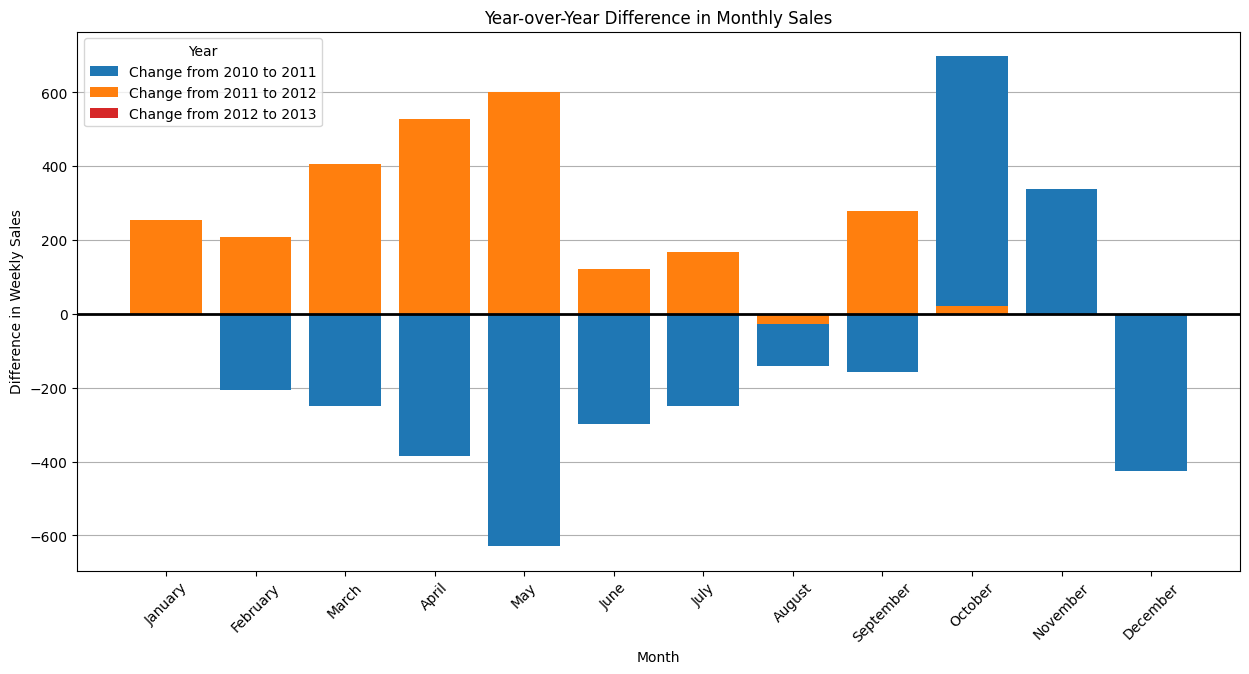

In [162]:
# Tạo bảng xoay để có năm làm cột và tháng làm hàng
pivot_sales = monthly_data.pivot(index='Month', columns='Year', values='Weekly_Sales')

# Tính sự khác biệt giữa các năm
yearly_diff = pivot_sales.diff(axis=1)

# Loại bỏ cột đầu tiên vì giá trị sẽ là NaN do phép tính hiệu giữa các năm
yearly_diff = yearly_diff.iloc[:, 1:]

# Đặt lại chỉ số để làm phẳng DataFrame cho việc vẽ biểu đồ
yearly_diff = yearly_diff.reset_index().melt(id_vars='Month', var_name='Year', value_name='SalesDifference')

# Tạo biểu đồ
plt.figure(figsize=(15, 7))

# Định nghĩa bảng màu
palette = ['tab:blue', 'tab:orange', 'tab:red']

# Vẽ từng bộ cột biểu thị sự khác biệt giữa các năm
for i, year in enumerate(yearly_diff['Year'].unique()):
    # Lọc dữ liệu cho từng năm
    data = yearly_diff[yearly_diff['Year'] == year]
    plt.bar(data['Month'], data['SalesDifference'], color=palette[i], label=f'Change from {year-1} to {year}', zorder=2)

# Thêm đường ngang ở y=0 để dễ nhìn sự thay đổi
plt.axhline(y=0, color='black', linewidth=2)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Year-over-Year Difference in Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Difference in Weekly Sales')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.grid(axis='y', zorder=0)  # Thêm lưới theo trục y

# Thêm chú thích
plt.legend(title='Year', loc='upper left')
plt.show()  # Hiển thị biểu đồ


Biểu đồ trên cho thấy từ khi các chương trình giảm giá được giới thiệu vào tháng 11 năm 2011, doanh số đã tăng trưởng ổn định, đặc biệt là từ tháng 1 đến tháng 5 năm 2012. 
Tuy nhiên, doanh số tháng 12 năm 2011 lại thấp hơn so với tháng 12 năm 2010. 
Tác động của giảm giá có vẻ rõ rệt hơn trong các tháng không phải kỳ nghỉ, với ảnh hưởng lớn nhất được quan sát trong giai đoạn từ tháng 1 đến tháng 5 năm 2012.

# Hiệu suất của các cửa hàng và phòng ban hàng đầu

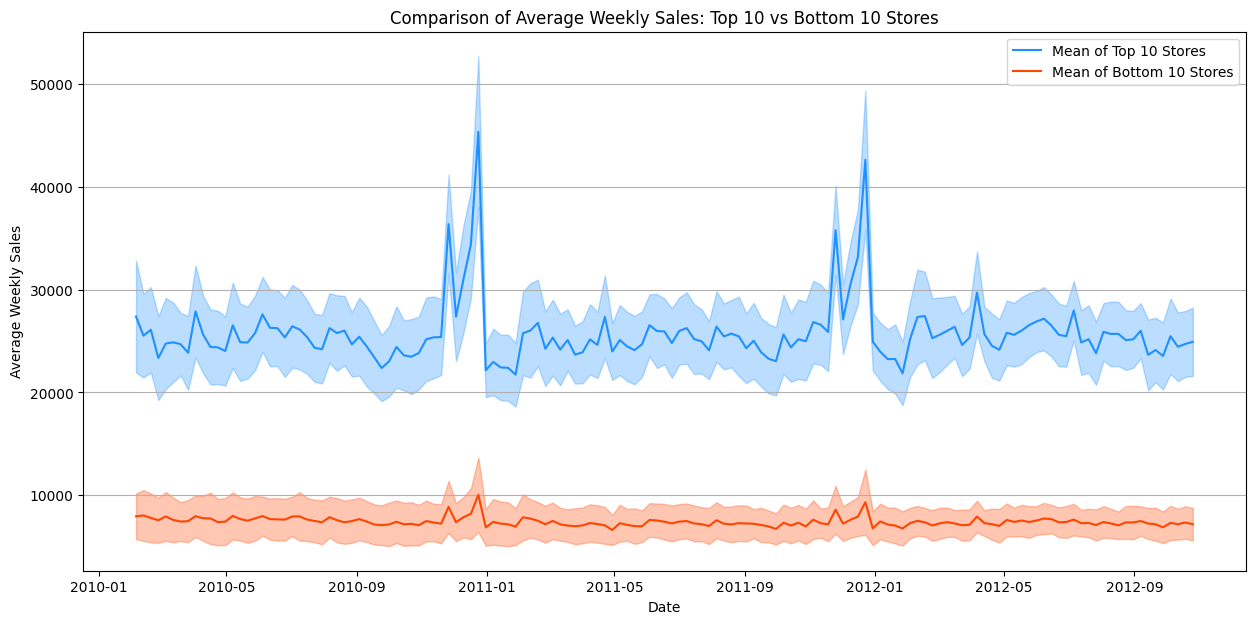

In [163]:
# Nhóm dữ liệu theo 'Store' và 'Date' và tính trung bình của 'Weekly_Sales'
grouped_data = mergedDF.groupby(['Store', 'Date'])['Weekly_Sales'].mean().reset_index()

# Xác định 10 cửa hàng hàng đầu và 10 cửa hàng cuối bảng dựa trên xếp hạng
top_10_stores = rankedStores.nlargest(10).index.tolist()
bottom_10_stores = rankedStores.nsmallest(10).index.tolist()

# Hàm tính trung bình và độ lệch chuẩn của 'Weekly_Sales' cho danh sách các cửa hàng
def calculate_stats(store_list):
    store_data = grouped_data[grouped_data['Store'].isin(store_list)]  # Lọc dữ liệu chỉ cho các cửa hàng trong danh sách
    return store_data.groupby('Date')['Weekly_Sales'].agg(['mean', 'std'])  # Nhóm theo 'Date' và tính trung bình, độ lệch chuẩn

# Tính toán thống kê cho 10 cửa hàng hàng đầu và 10 cửa hàng cuối bảng
top_10_stats = calculate_stats(top_10_stores)
bottom_10_stats = calculate_stats(bottom_10_stores)

# Thiết lập biểu đồ
plt.figure(figsize=(15, 7))

# Vẽ đường biểu diễn trung bình doanh số hàng tuần cho 10 cửa hàng hàng đầu
plt.plot(top_10_stats.index, top_10_stats['mean'], label='Mean of Top 10 Stores', color='dodgerblue')

# Tô màu khu vực giữa trung bình ± độ lệch chuẩn cho 10 cửa hàng hàng đầu
plt.fill_between(top_10_stats.index, 
                 top_10_stats['mean'] - top_10_stats['std'], 
                 top_10_stats['mean'] + top_10_stats['std'], 
                 color='dodgerblue', alpha=0.3)

# Vẽ đường biểu diễn trung bình doanh số hàng tuần cho 10 cửa hàng cuối bảng
plt.plot(bottom_10_stats.index, bottom_10_stats['mean'], label='Mean of Bottom 10 Stores', color='orangered')

# Tô màu khu vực giữa trung bình ± độ lệch chuẩn cho 10 cửa hàng cuối bảng
plt.fill_between(bottom_10_stats.index, 
                 bottom_10_stats['mean'] - bottom_10_stats['std'], 
                 bottom_10_stats['mean'] + bottom_10_stats['std'], 
                 color='orangered', alpha=0.3)

# Thiết lập tiêu đề và nhãn cho biểu đồ
plt.title('Comparison of Average Weekly Sales: Top 10 vs Bottom 10 Stores')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')

# Thêm chú thích và lưới cho biểu đồ dễ đọc hơn
plt.legend()
plt.grid(axis='y')

# Hiển thị biểu đồ
plt.show()


Biểu đồ cho thấy các cửa hàng hàng đầu có doanh số cao và ổn định hơn. Có những đỉnh cao rõ rệt vào khoảng thời gian cuối năm (dịp lễ hội): cuối năm 2010, cuối năm 2011. Xu hướng doanh số vẫn ổn định với mức dao động không quá lớn giữa các thời kỳ ngoài mùa lễ hội.

Ngược lại các cửa hàng cuối bảng có doanh số thấp, chỉ đạt khoảng 1/3 so với nhóm Top 10 Store. Biên độ dao động thấp hơn, cho thấy doanh số khá ổn định ở mức thấp.

Tổng thể, các cửa hàng hàng đầu vượt trội hơn về doanh số và sự ổn định.

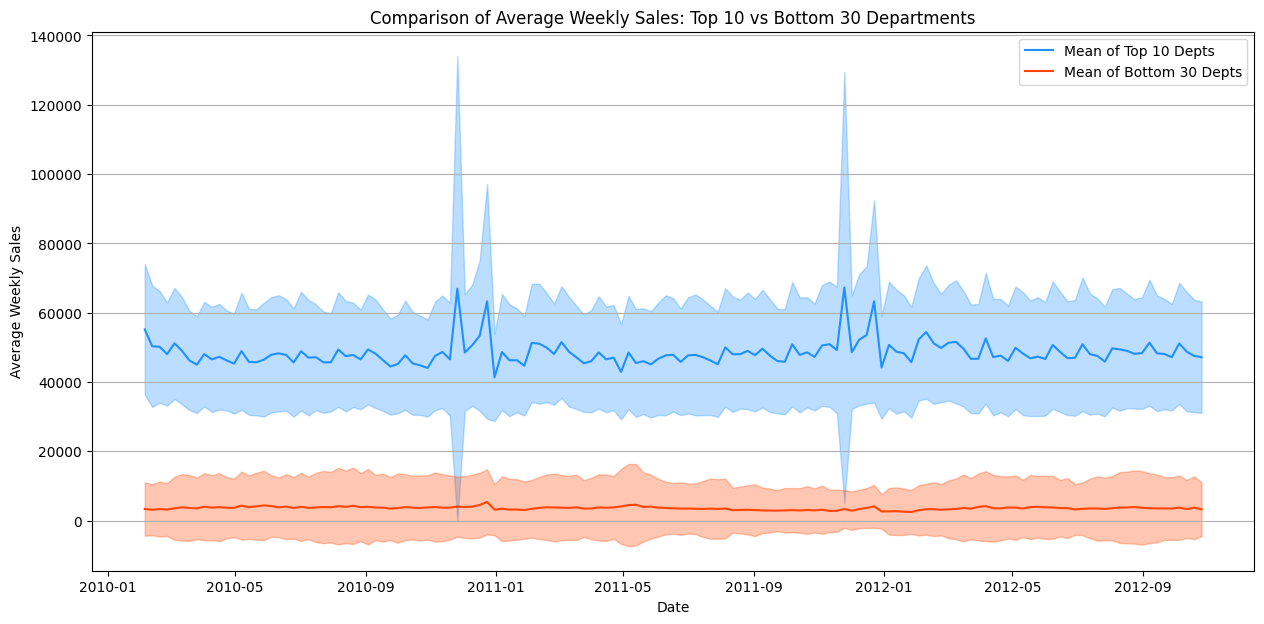

In [164]:
# Nhóm dữ liệu theo 'Dept' và 'Date' và tính trung bình của 'Weekly_Sales'
grouped_data = mergedDF.groupby(['Dept', 'Date'])['Weekly_Sales'].mean().reset_index()

# Chọn 10 phòng ban có doanh số cao nhất và 30 phòng ban có doanh số thấp nhất
top_10_stores = rankedDepts.nlargest(10).index.tolist()
bottom_10_stores = rankedDepts.nsmallest(30).index.tolist()

# Hàm tính toán trung bình và độ lệch chuẩn cho danh sách các phòng ban
def calculate_stats(store_list):
    store_data = grouped_data[grouped_data['Dept'].isin(store_list)]
    return store_data.groupby('Date')['Weekly_Sales'].agg(['mean', 'std'])

# Tính toán thống kê cho 10 phòng ban hàng đầu và 30 phòng ban cuối
top_10_stats = calculate_stats(top_10_stores)
bottom_10_stats = calculate_stats(bottom_10_stores)

# Vẽ biểu đồ
plt.figure(figsize=(15, 7))

# Vẽ dữ liệu cho 10 phòng ban hàng đầu
plt.plot(top_10_stats.index, top_10_stats['mean'], label='Mean of Top 10 Depts', color='dodgerblue')
plt.fill_between(top_10_stats.index, 
                 top_10_stats['mean'] - top_10_stats['std'], 
                 top_10_stats['mean'] + top_10_stats['std'], 
                 color='dodgerblue', alpha=0.3)

# Vẽ dữ liệu cho 30 phòng ban cuối
plt.plot(bottom_10_stats.index, bottom_10_stats['mean'], label='Mean of Bottom 30 Depts', color='orangered')
plt.fill_between(bottom_10_stats.index, 
                 bottom_10_stats['mean'] - bottom_10_stats['std'], 
                 bottom_10_stats['mean'] + bottom_10_stats['std'], 
                 color='orangered', alpha=0.3)

# Thêm tiêu đề và nhãn
plt.title('Comparison of Average Weekly Sales: Top 10 vs Bottom 30 Departments')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.legend()  # Hiển thị chú giải
plt.grid(axis='y')  # Thêm lưới theo trục y
plt.show()  # Hiển thị biểu đồ



Biểu đồ cho thấy sự khác biệt giữa 10 phòng ban đầu và 30 phòng ban cuối.
Các phòng ban đầu có doanh thu cao hơn và biến động lớn, trong khi các phòng ban cuối có doanh thu thấp và ổn định. 
Điều này phản ánh hiệu suất kinh doanh không giống nhau giữa các phòng ban trên và các phòng ban dưới.


## Hãy cùng xem xét 10 cửa hàng hàng đầu và những yếu tố ảnh hưởng đến hiệu suất của chúng

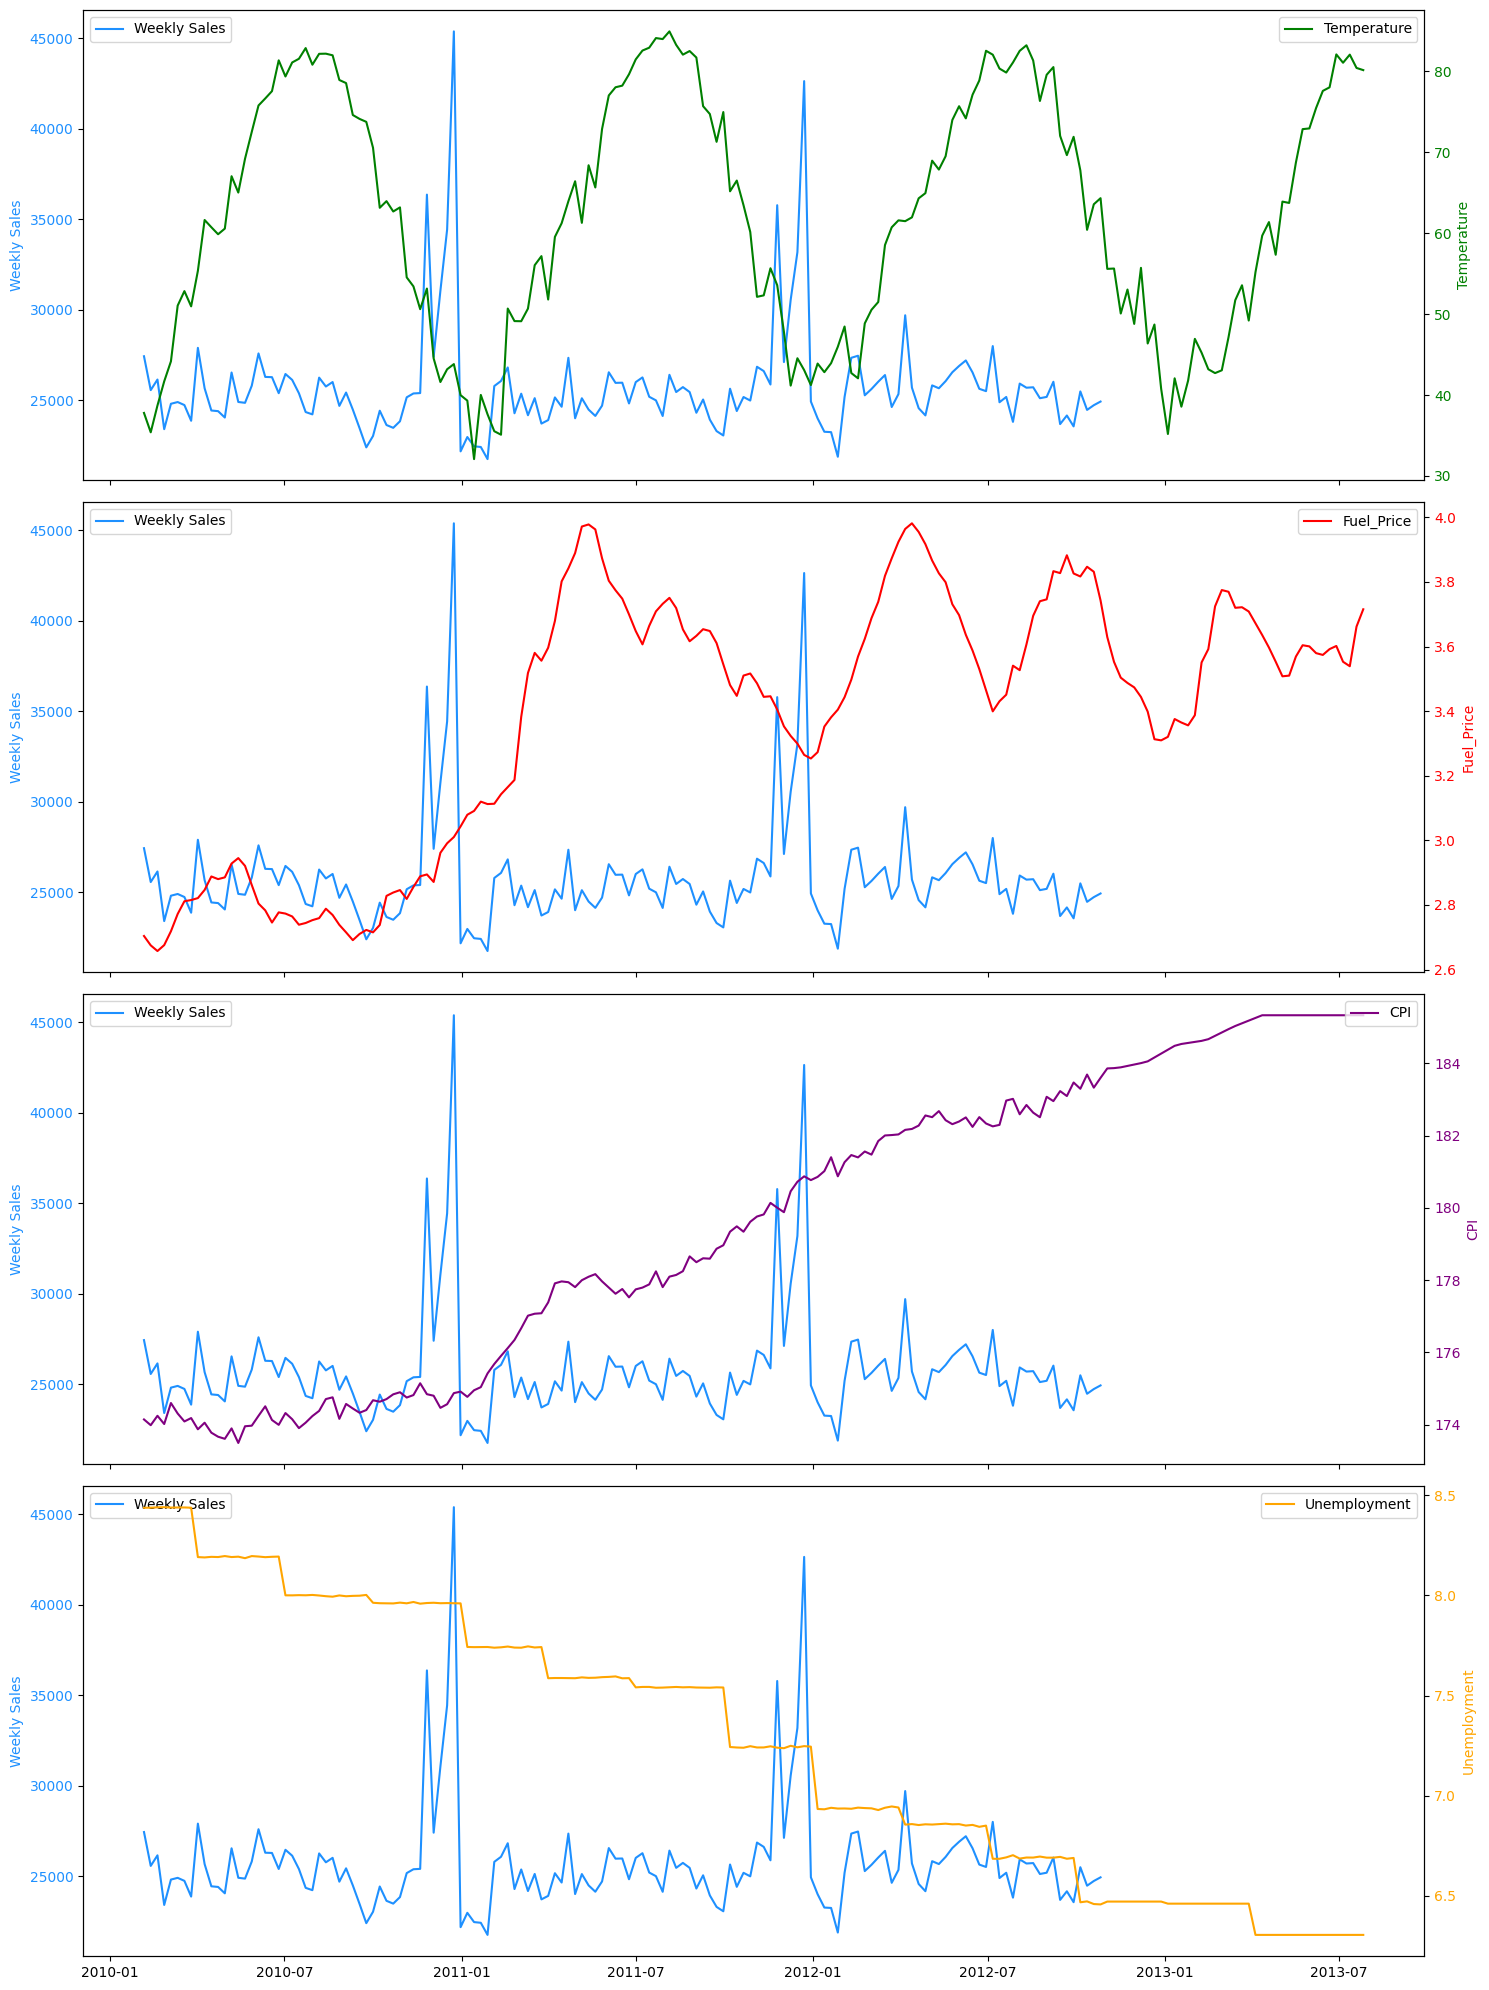

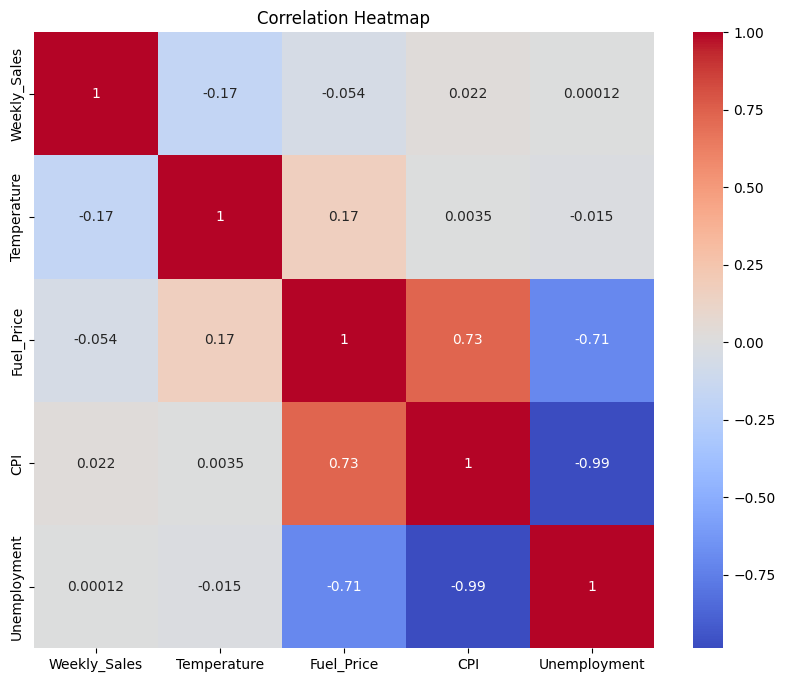

In [165]:
# Lọc dữ liệu cho 10 cửa hàng hàng đầu
top_10_stores = rankedStores.nlargest(10).index.tolist()
top_10_data = mergedDF[mergedDF['Store'].isin(top_10_stores)]

# Nhóm dữ liệu theo 'Date' và tính trung bình cho các cột cần thiết
grouped_data = top_10_data.groupby('Date')[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].mean().reset_index()

# Thiết lập biểu đồ với 4 hàng và 1 cột
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20), sharex=True)

# Danh sách các cột để vẽ cùng với 'Weekly_Sales' và màu tương ứng của chúng
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
colors = ['green', 'red', 'purple', 'orange']

# Vòng lặp qua các cột và vẽ dữ liệu
for i, col in enumerate(columns):
    ax1 = axes[i]  # Trục chính cho 'Weekly_Sales'
    ax2 = ax1.twinx()  # Trục phụ cho cột hiện tại (nhiệt độ, giá nhiên liệu, CPI, tỷ lệ thất nghiệp)
    
    # Vẽ biểu đồ cho 'Weekly_Sales'
    ax1.plot(grouped_data['Date'], grouped_data['Weekly_Sales'], color='dodgerblue', label='Weekly Sales')
    ax1.set_ylabel('Weekly Sales', color='dodgerblue')  # Đặt nhãn cho trục y của 'Weekly_Sales'
    ax1.tick_params(axis='y', labelcolor='dodgerblue')  # Đặt màu nhãn cho 'Weekly Sales'
    
    # Vẽ biểu đồ cho cột hiện tại
    ax2.plot(grouped_data['Date'], grouped_data[col], color=colors[i], label=col)
    ax2.set_ylabel(col, color=colors[i])  # Đặt nhãn cho trục y của cột hiện tại
    ax2.tick_params(axis='y', labelcolor=colors[i])  # Đặt màu nhãn cho cột hiện tại

    # Thêm chú thích cho từng biểu đồ
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Tùy chỉnh khoảng cách giữa các biểu đồ để tránh chồng chéo
plt.tight_layout()
plt.show()

# Vẽ biểu đồ heatmap cho ma trận tương quan
corr = grouped_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Doanh số không bị ảnh hưởng trực tiếp bởi các yếu tố như nhiệt độ, giá nhiên liệu, CPI, hay tỷ lệ thất nghiệp. Các biến động lớn chủ yếu do mùa lễ hội.

Giá nhiên liệu, CPI, và tỷ lệ thất nghiệp có mối tương quan chặt chẽ với nhau, phản ánh tình hình kinh tế vĩ mô.

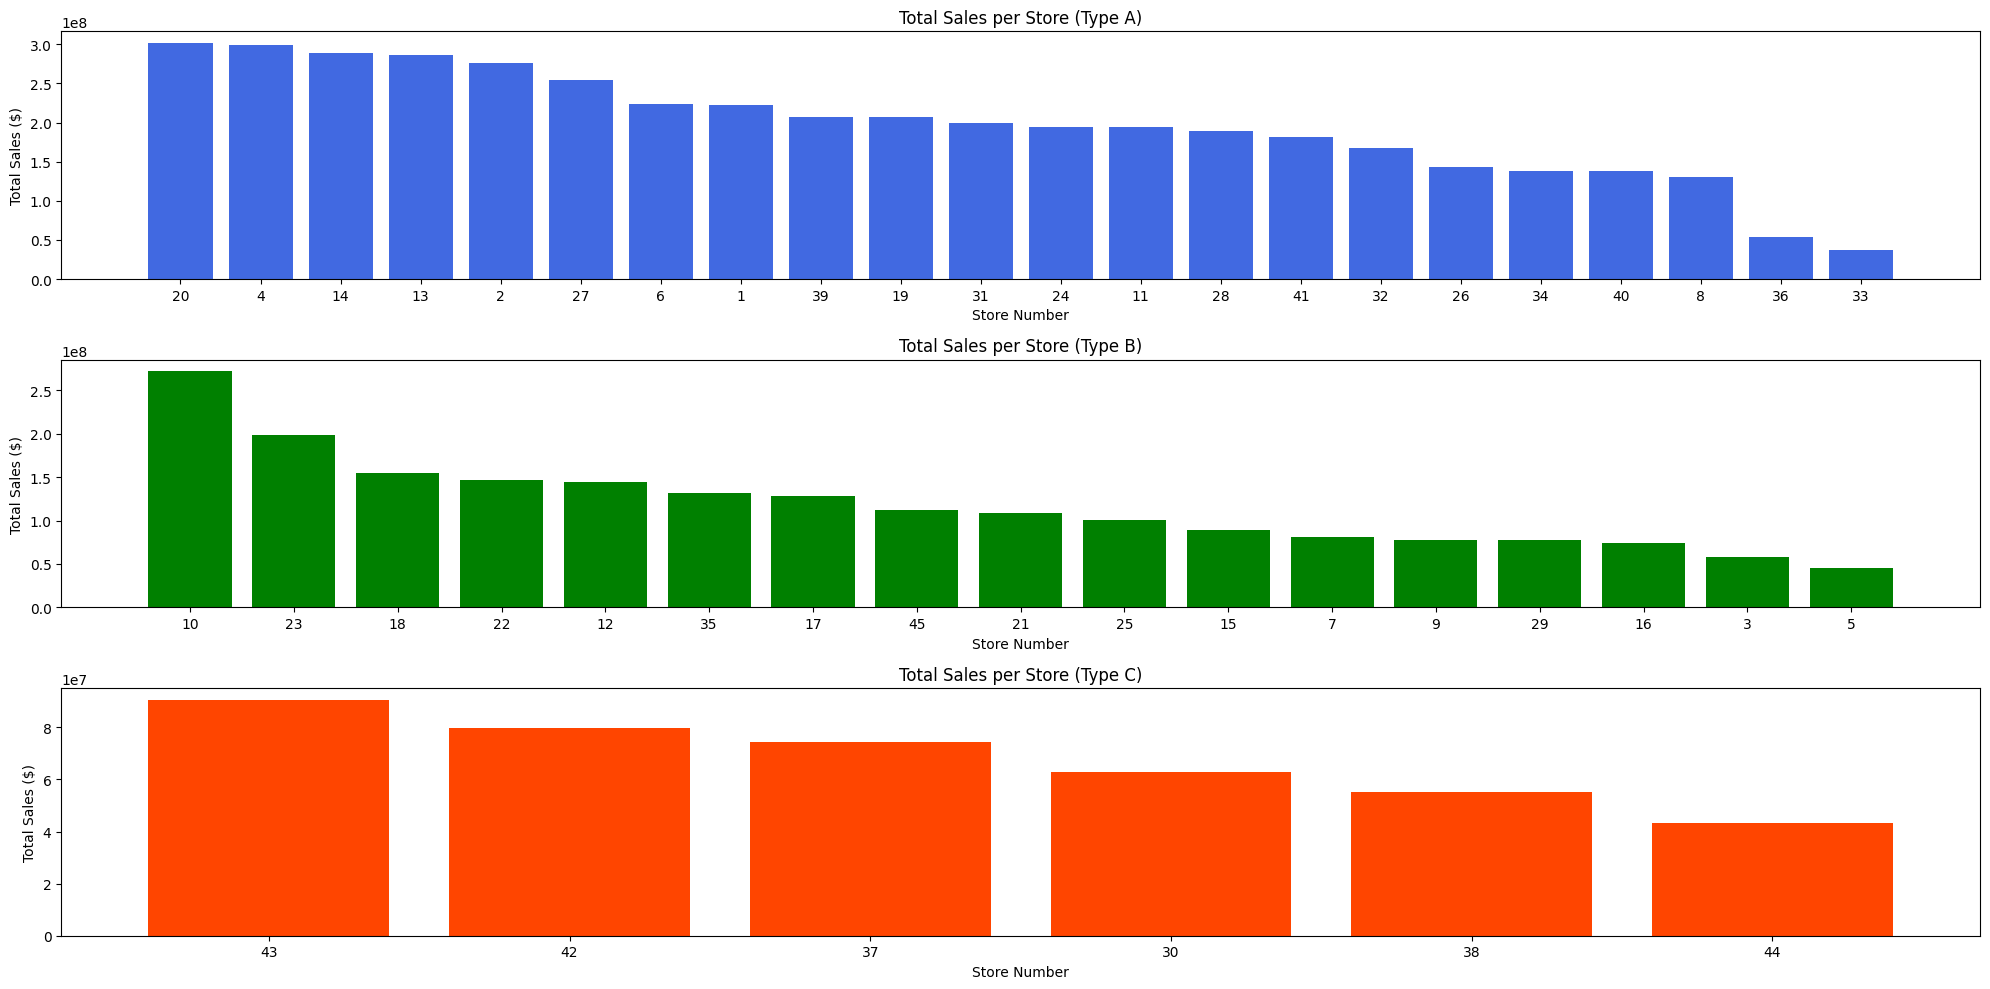

In [166]:
# Lọc dữ liệu cho từng loại cửa hàng (A, B, C)
storesA = mergedDF[mergedDF['Type']=='A']
storesB = mergedDF[mergedDF['Type']=='B']
storesC = mergedDF[mergedDF['Type']=='C']

# Tổng hợp dữ liệu doanh số tại các cửa hàng cho từng loại
totalSales_A = storesA.groupby('Store')['Weekly_Sales'].sum()
totalSales_B = storesB.groupby('Store')['Weekly_Sales'].sum()
totalSales_C = storesC.groupby('Store')['Weekly_Sales'].sum()

# Sắp xếp các cửa hàng trong từng loại dựa trên tổng doanh số giảm dần
rankedStores_A = totalSales_A.sort_values(ascending=False)
rankedStores_B = totalSales_B.sort_values(ascending=False)
rankedStores_C = totalSales_C.sort_values(ascending=False)

# Định nghĩa màu sắc cho từng loại cửa hàng
type_colors = {'A': 'royalblue', 'B': 'green', 'C': 'orangered'}

# Tạo biểu đồ thanh riêng biệt cho từng loại cửa hàng
plt.figure(figsize=(20, 10))

# Biểu đồ cho loại A
plt.subplot(311)
plt.bar(range(len(rankedStores_A)), rankedStores_A.values, color=type_colors['A'])
plt.title('Total Sales per Store (Type A)')
plt.xlabel('Store Number')
plt.ylabel('Total Sales ($)')

# Thiết lập nhãn trục x là số cửa hàng cho loại A
xticks_labels = rankedStores_A.index.tolist()  # Dùng số cửa hàng của loại A
plt.xticks(range(len(xticks_labels)), xticks_labels)

# Biểu đồ cho loại B
plt.subplot(312)
plt.bar(range(len(rankedStores_B)), rankedStores_B.values, color=type_colors['B'])
plt.title('Total Sales per Store (Type B)')
plt.xlabel('Store Number')
plt.ylabel('Total Sales ($)')

# Thiết lập nhãn trục x là số cửa hàng cho loại B
xticks_labels = rankedStores_B.index.tolist()  # Dùng số cửa hàng của loại B
plt.xticks(range(len(xticks_labels)), xticks_labels)

# Biểu đồ cho loại C
plt.subplot(313)
plt.bar(range(len(rankedStores_C)), rankedStores_C.values, color=type_colors['C'])
plt.title('Total Sales per Store (Type C)')
plt.xlabel('Store Number')
plt.ylabel('Total Sales ($)')

# Thiết lập nhãn trục x là số cửa hàng cho loại C
xticks_labels = rankedStores_C.index.tolist()  # Dùng số cửa hàng của loại C
plt.xticks(range(len(xticks_labels)), xticks_labels)

# Điều chỉnh khoảng cách giữa các biểu đồ con
plt.tight_layout()

# Hiển thị các biểu đồ
plt.show()


Biểu đồ thể hiện doanh thu tổng hợp theo từng cửa hàng cho các loại A, B và C, với các cửa hàng được sắp xếp theo doanh thu giảm dần. Cửa hàng số 20, 4, 14, và 13 có doanh số cao nhất trong cửa hàng loại A, vượt mốc 300 triệu USD. Cửa hàng 36, và 33 có doanh số thấp nhất, dưới 100 triệu USD. Cửa hàng loại A: Là nhóm có doanh số cao nhất, với nhiều cửa hàng vượt trội. Đây có thể là các cửa hàng lớn hoặc nằm ở khu vực có sức mua cao.   

Ở cửa hàng loại B cửa hàng số 10 có doanh thu cao nhất với doanh số vượt 250 triệu USD USD và thấp nhất là cửa hàng số 5 với doanh số dưới 50 triệu USD. Type B: Là nhóm có sự phân hóa doanh số rõ ràng hơn, với một số cửa hàng dẫn đầu nhưng phần lớn doanh thu nằm ở mức trung bình.  

Nhóm Type C có ít cửa hàng và tổng doanh số thấp hơn nhiều so với Type A và B. Các cửa hàng trong nhóm này có doanh số tương đối đồng đều, không có sự khác biệt lớn như ở nhóm Type A. Ở cửa hàng loại C cửa hàng số 43 có doanh thu cao nhất là 80 triệu USD và thấp nhất là cửa hàng số 44 là 60 triệu USD.  

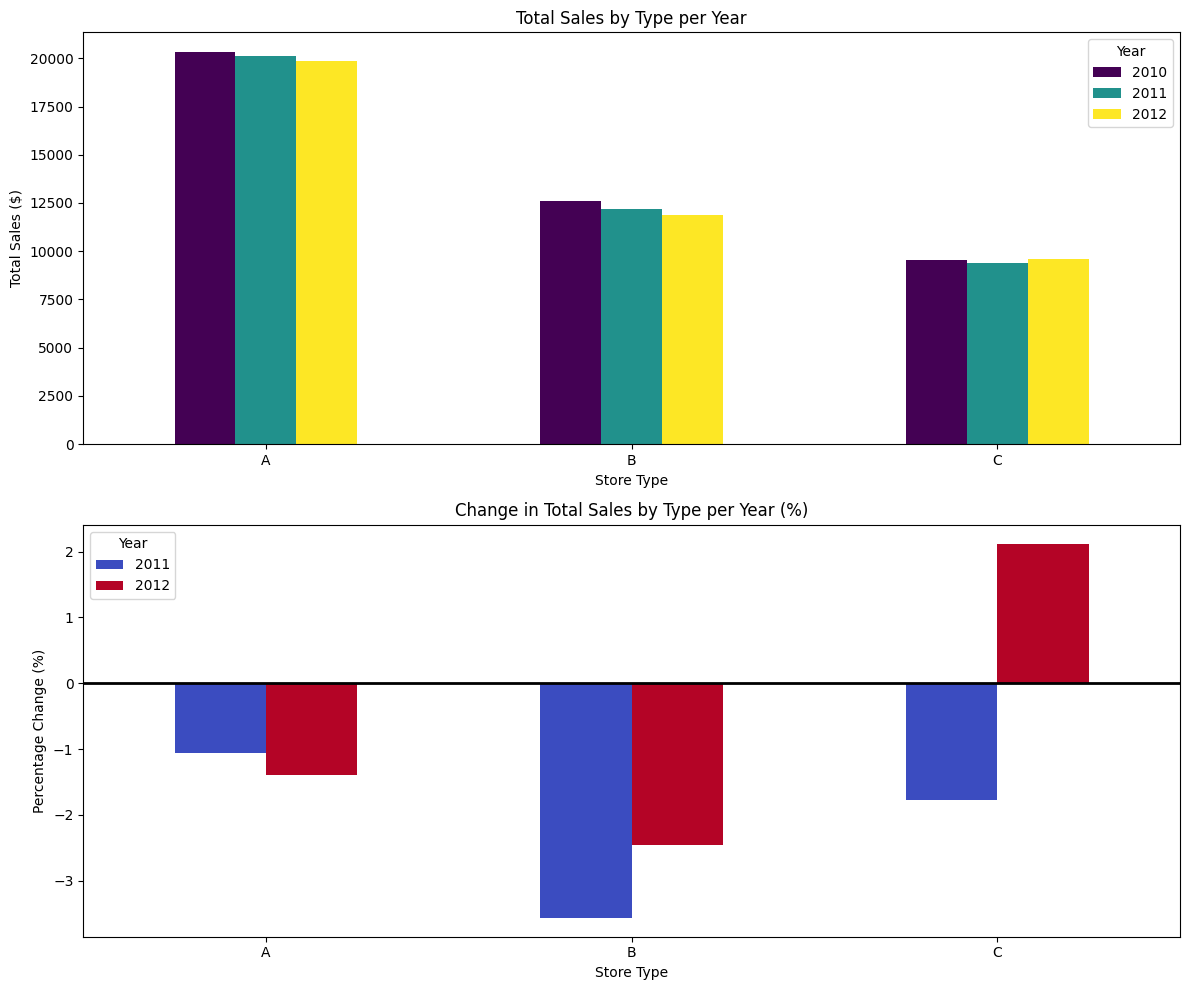

In [167]:
# Lọc DataFrame để loại bỏ năm 2013 khỏi dữ liệu
filteredDF = mergedDF[mergedDF['Year'] != 2013]

# Tổng hợp dữ liệu doanh số trung bình tại cấp cửa hàng cho từng loại theo năm
totalSales_by_type_year = filteredDF.groupby(['Type', 'Year'])['Weekly_Sales'].mean().unstack()

# Tính toán phần trăm thay đổi doanh số so với năm trước
totalSales_change_by_type_year = totalSales_by_type_year.pct_change(axis=1) * 100  # Tính phần trăm thay đổi
totalSales_change_by_type_year = totalSales_change_by_type_year.drop(columns=2010)  # Loại bỏ cột năm 2010 (không có năm trước để so sánh)

# Tạo một hình với hai biểu đồ con
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Vẽ biểu đồ thanh cho tổng doanh số theo từng loại cửa hàng qua các năm
totalSales_by_type_year.plot(kind='bar', ax=axes[0], colormap='viridis', rot=0)
axes[0].set_title('Total Sales by Type per Year')
axes[0].set_xlabel('Store Type')
axes[0].set_ylabel('Total Sales ($)')
axes[0].legend(title='Year')

# Vẽ biểu đồ thanh cho sự thay đổi phần trăm doanh số của từng loại cửa hàng theo năm
totalSales_change_by_type_year.plot(kind='bar', ax=axes[1], colormap='coolwarm', rot=0)
axes[1].set_title('Change in Total Sales by Type per Year (%)')
axes[1].set_xlabel('Store Type')
axes[1].set_ylabel('Percentage Change (%)')
axes[1].legend(title='Year')
axes[1].axhline(y=0, linewidth=2, color='k')  # Đường ngang ở mức 0 để dễ so sánh tăng giảm

# Điều chỉnh khoảng cách giữa các biểu đồ con
plt.tight_layout()

# Hiển thị các biểu đồ
plt.show()


Qua biểu đồ trên có thể thấy được rằng doanh thu có chiều hướng giảm qua các năm. Các cửa hàng loại A có doanh thu cao nhất mỗi năm, tiếp theo là các cửa hàng loại B và C. Ngoài ra, các cửa hàng loại A và B đã trải qua sự sụt giảm doanh thu, trong khi cửa hàng loại C là nhóm duy nhất có có sự gia tăng doanh thu 2% vào năm 2012, cho thấy tiềm năng phát triển nếu được đầu tư đúng hướng.

# Nguyên nhân gì đã gây ra sự sụt giảm doanh số từ năm 2011 đến năm 2012?

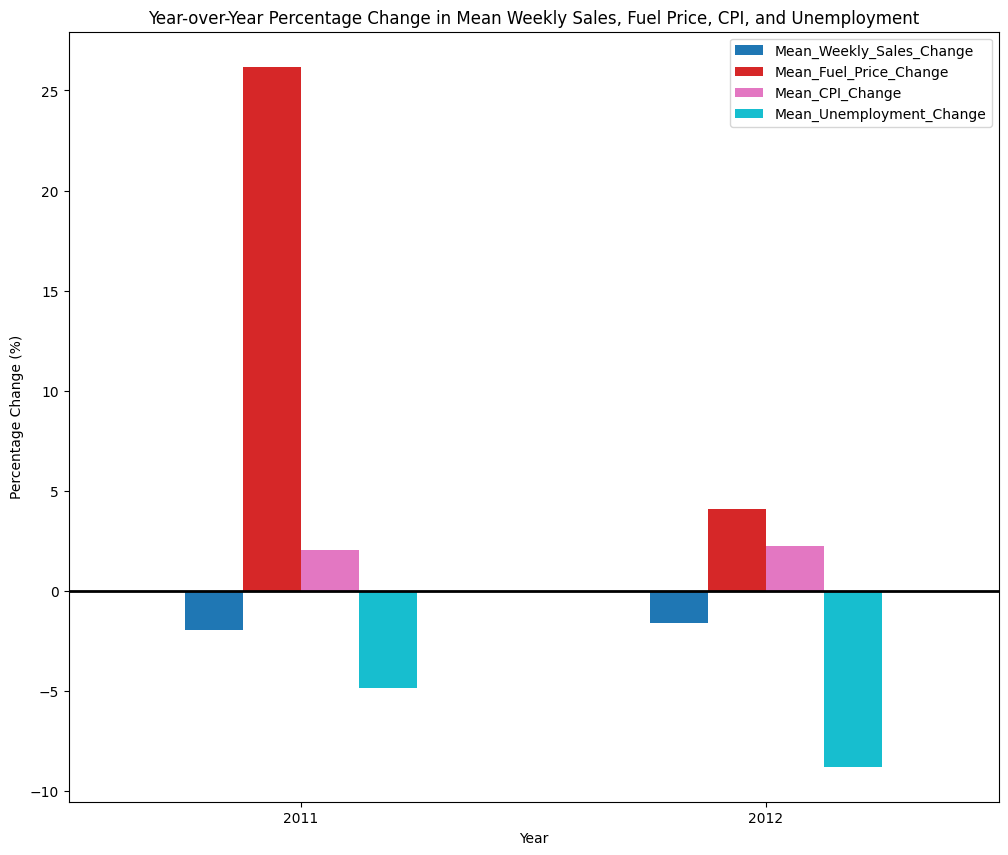

In [168]:
# Nhóm dữ liệu theo 'Year' và tính trung bình cho các cột 'Weekly_Sales', 'Fuel_Price', 'CPI', và 'Unemployment'
yearly_mean_data = mergedDF.groupby('Year')[['Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment']].mean()

# Tạo một DataFrame trống để lưu trữ dữ liệu thay đổi phần trăm theo năm
yearly_change_data = pd.DataFrame()

# Tính phần trăm thay đổi theo năm cho các cột trung bình
yearly_change_data['Mean_Weekly_Sales_Change'] = yearly_mean_data['Weekly_Sales'].pct_change() * 100
yearly_change_data['Mean_Fuel_Price_Change'] = yearly_mean_data['Fuel_Price'].pct_change() * 100
yearly_change_data['Mean_CPI_Change'] = yearly_mean_data['CPI'].pct_change() * 100
yearly_change_data['Mean_Unemployment_Change'] = yearly_mean_data['Unemployment'].pct_change() * 100

# Đặt lại chỉ mục để đưa 'Year' trở thành một cột
yearly_mean_data = yearly_mean_data.reset_index()

# Loại bỏ các hàng của năm 2010 và 2013 khỏi dữ liệu thay đổi phần trăm
yearly_change_data = yearly_change_data.drop([2010, 2013])

# Tạo biểu đồ thanh cho các thay đổi phần trăm theo từng năm
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
yearly_change_data.plot(kind='bar', ax=axes, colormap='tab10', rot=0)
axes.set_title('Year-over-Year Percentage Change in Mean Weekly Sales, Fuel Price, CPI, and Unemployment')
axes.set_xlabel('Year')
axes.set_ylabel('Percentage Change (%)')
axes.axhline(y=0, linewidth=2, color='k')  # Đường ngang tại mức 0 để so sánh sự tăng/giảm
plt.legend()  # Hiển thị chú giải
plt.show()



Qua biểu đồ chúng ta nhận thấy rằng giữa năm 2011 và 2012, việc giảm tỷ lệ thất nghiệp, tăng chỉ số giá tiêu dùng (CPI) và các chương trình giảm giá đã giúp giảm tốc độ doanh thu hàng tuần chậm lại, vì vậy yếu tố này có thể góp phần làm giảm sự biến động và giúp doanh nghiệp ổn định hơn.

# Dự đoán doanh số trong tương lai

## 1. Hiểu về tính thời vụ:

<Figure size 1200x600 with 0 Axes>

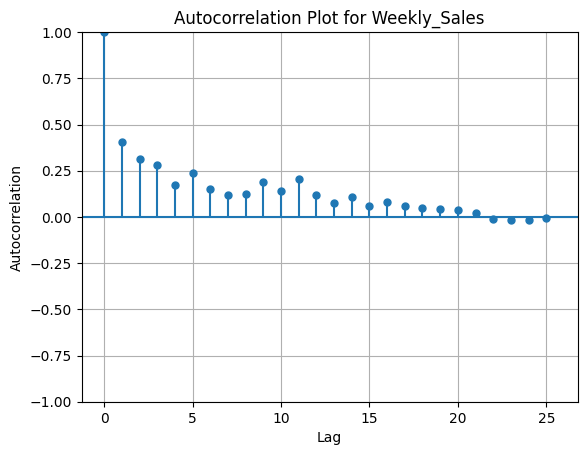

<Figure size 1200x600 with 0 Axes>

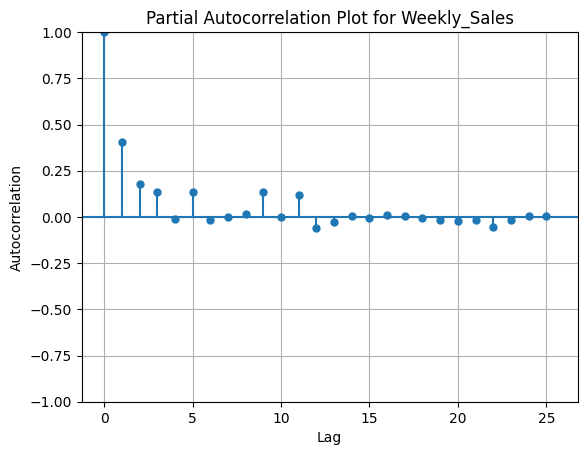

In [169]:
#Phân tích tính chất chu kỳ và xu hướng của doanh số bán hàng (Weekly_Sales) theo thời gian

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

mergedDF.dropna(inplace=True)

# Chuyển đổi mergedDF thành một DataFrame chuỗi thời gian, nơi các giá trị Date là chỉ số để thuận tiện trong phân tích.
# Đặt cột Date làm chỉ số (index) cho DataFrame ts_df.
ts_df = mergedDF.set_index('Date')

# Vẽ hàm tự tương quan (ACF) cho Weekly_Sales
plt.figure(figsize=(12, 6))
plot_acf(ts_df['Weekly_Sales'], lags=25)
plt.title("Autocorrelation Plot for Weekly_Sales")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

# Vẽ hàm tự tương quan một phần (PACF) cho Weekly_Sales
plt.figure(figsize=(12, 6))
plot_pacf(ts_df['Weekly_Sales'], lags=25)
plt.title("Partial Autocorrelation Plot for Weekly_Sales")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

Nhận xét về hai biểu đồ:
1. Biểu đồ ACF (Autocorrelation Function)

Ý nghĩa:  
Biểu đồ ACF thể hiện mối tương quan giữa doanh số bán hàng hiện tại (Weekly_Sales) và các giá trị doanh số trước đó (lags).
Mỗi cột dọc đại diện cho mức độ tương quan giữa doanh số tại thời điểm hiện tại và tại lag tương ứng.

Quan sát:  
Các giá trị tự tương quan cao ở các lag ban đầu (lag 1, lag 2, ...) và giảm dần khi lag tăng.
Tại lag 7, có thể có dấu hiệu của một chu kỳ nhẹ (phản ánh có thể có ảnh hưởng hàng tuần).
Sự giảm dần tự tương quan sau các lag đầu cho thấy dữ liệu có xu hướng dần không phụ thuộc khi lag lớn hơn.

Kết luận:  
Doanh số hiện tại có mối quan hệ mạnh với doanh số gần đây (trong khoảng 1-2 tuần trước).

2. Biểu đồ PACF (Partial Autocorrelation Function)

Ý nghĩa:  
Biểu đồ PACF thể hiện mức độ tương quan trực tiếp giữa doanh số hiện tại và và các giá trị trễ, sau khi loại bỏ ảnh hưởng của các lags trung gian.
Các cột dọc đại diện cho tương quan từng phần tại các lag cụ thể.

Quan sát:  
Tại lag 1, tương quan từng phần cao nhất, cho thấy doanh số của tuần trước có ảnh hưởng mạnh nhất đến doanh số hiện tại.
Tương quan giảm dần và trở về gần như bằng 0 sau lag 2.
Tại các lag lớn hơn, không có giá trị tương quan mạnh, điều này cho thấy chỉ các giá trị gần nhất (1-2 tuần) là có ý nghĩa.

Kết luận:  
Dữ liệu doanh số chỉ phụ thuộc mạnh vào các giá trị trễ gần nhất (lag 1 và lag 2).

In [170]:
# Tạo một cột mới, Lagged_Weekly_Sales, chứa giá trị doanh số của ngày trước đó (lag = 1), xác định mức độ phụ thuộc ngắn hạn của doanh số
mergedDF['Lagged_Weekly_Sales'] = mergedDF['Weekly_Sales'].shift(1)

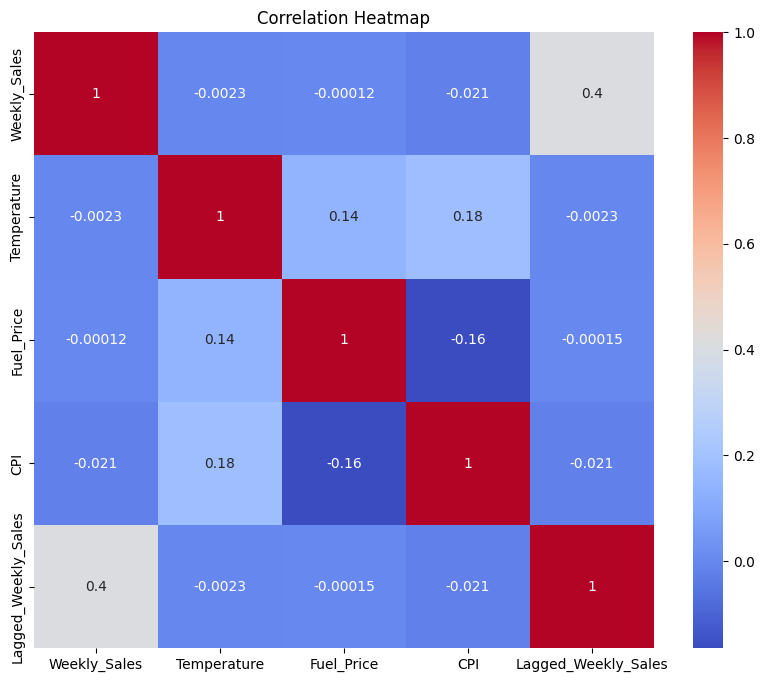

In [171]:
# Chọn các cột để tính toán ma trận tương quan
corr = mergedDF[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Lagged_Weekly_Sales']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Biến quan trọng nhất: Biến Lagged_Weekly_Sales (doanh số trễ) có tương quan cao nhất với Weekly_Sales. Điều này cho thấy doanh số hiện tại phụ thuộc mạnh mẽ vào doanh số của ngày trước đó. Vì vậy, cần sử dụng biến này trong các mô hình dự báo.  

Các biến không đáng kể: 
Temperature, Fuel_Price, và CPI có mối tương quan rất yếu hoặc không đáng kể với doanh số. Có thể bỏ qua chúng khi xây dựng mô hình dự báo doanh số   .

Hướng ứng dụng: Tập trung vào việc sử dụng các biến trễ (lags) để cải thiện dự hình.

In [172]:
# Mô hình hóa hồi quy tuyến tính (LinearRegression) để dự đoán doanh số bán hàng (Weekly_Sales)

from sklearn.linear_model import LinearRegression

# Chọn các đặc trưng (features) và mục tiêu (target)
X = mergedDF.loc[:, ['Lagged_Weekly_Sales']].dropna()  # features
y = mergedDF.loc[:, 'Weekly_Sales']  # target
y, X = y.align(X, join='inner') 

#Chuẩn hóa các giá trị
X = X/1e3
y = y/1e3

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

y_pred =  pd.Series(model.predict(X), index=X.index)

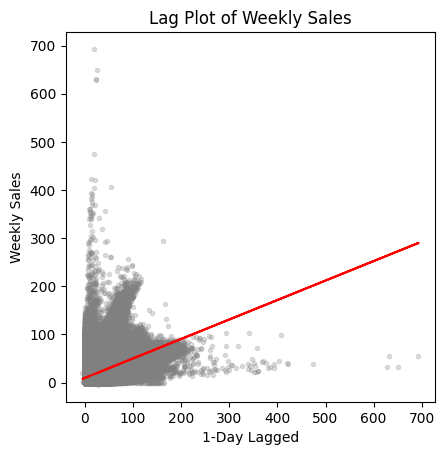

In [173]:
fig, ax = plt.subplots()
ax.plot(X['Lagged_Weekly_Sales'], y, '.', color='gray',alpha=0.25)
ax.plot(X['Lagged_Weekly_Sales'], y_pred,color='red')
ax.set(aspect='equal', ylabel='Weekly Sales', xlabel='1-Day Lagged', title='Lag Plot of Weekly Sales');

Phần lớn các điểm dữ liệu tập trung ở khu vực giá trị thấp của cả 1-Day Lagged và Weekly Sales (dưới 100).  
Dữ liệu có xu hướng phân tán rộng và không tập trung thành một đường thẳng, đặc biệt khi giá trị trễ (1-Day Lagged) tăng cao.
Điều này gợi ý rằng mối quan hệ giữa doanh số bán hàng và giá trị trễ không hoàn toàn là tuyến tính. Mô hình hồi quy tuyến tính có thể không phải là lựa chọn tối ưu trong trường hợp này.

## Chúng ta có thể làm tốt hơn với dữ liệu trung bình hàng tháng không?


<Figure size 1200x600 with 0 Axes>

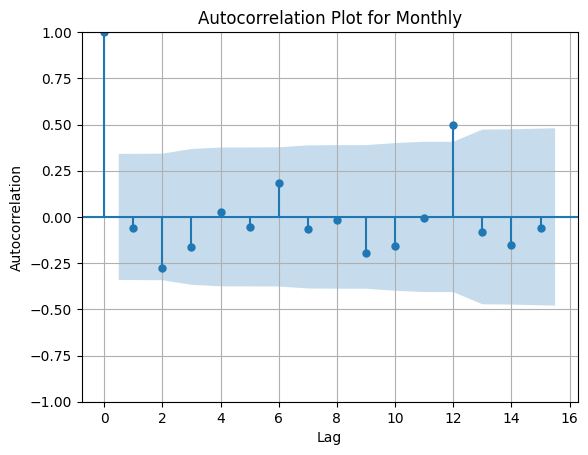

<Figure size 1200x600 with 0 Axes>

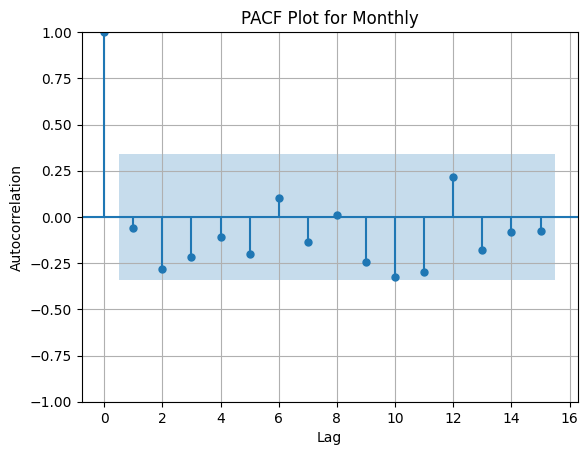

In [174]:
# Sử dụng dữ liệu trung bình hàng tháng (monthlySales) thay vì dữ liệu hàng tuần

df = monthlySales.dropna()
plt.figure(figsize=(12, 6))
plot_acf(df['Weekly_Sales'],lags=15) # tức là chúng ta sẽ xem xét sự tương quan giữa doanh số hiện tại và 15 giá trị doanh số trong quá khứ
plt.title("Autocorrelation Plot for Monthly")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

#Tính và vẽ Partial Autocorrelation Function (PACF) cho cột Weekly_Sales (doanh số bán hàng) trong DataFrame df
df = monthlySales.dropna()
plt.figure(figsize=(12, 6))
plot_pacf(df['Weekly_Sales'],lags=15)
plt.title("PACF Plot for Monthly")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

1. ACF - Chu kỳ hàng tháng và hàng năm:  
ACF hiển thị mức tự tương quan cao tại lag 12 (chu kỳ hàng năm).  
Các lag khác nằm trong khoảng không có ý nghĩa (trong vùng bóng mờ xanh), do đó không có tương quan mạnh.  

2. PACF - Ảnh hưởng trực tiếp từ lag 1 và lag 12:  
Biểu đồ PACF cho thấy giá trị tại lag 10 chạm vào biên ngoài của vùng bóng mờ, điều này có thể gợi ý một tương quan yếu nhưng có ý nghĩa ở lag này.
Các lag khác gần như không vượt ngưỡng ý nghĩa, điều này cho thấy chúng không có tác động trực tiếp.  

In [175]:
# Resample dữ liệu theo từng tháng và tính trung bình Weekly_Sales
monthlySales = mergedDF.resample('M', on='Date')['Weekly_Sales'].mean().reset_index()

# Tạo một cột mới 'Date_Numeric' biểu thị số ngày kể từ ngày bắt đầu trong dữ liệu
monthlySales['Date_Numeric'] = (monthlySales['Date'] - monthlySales['Date'].min()).dt.days

monthlySales

Date  Weekly_Sales  Date_Numeric
0  2010-02-28  16076.778701             0
1  2010-03-31  15432.626612            31
2  2010-04-30  15745.551340            61
3  2010-05-31  15996.481695            92
4  2010-06-30  16486.250953           122
5  2010-07-31  15972.812718           153
6  2010-08-31  16171.689295           184
7  2010-09-30  15120.086691           214
8  2010-10-31  14806.151498           245
9  2010-11-30  17320.130647           275
10 2010-12-31  19570.351252           306
11 2011-01-31  13997.773991           337
12 2011-02-28  15870.141203           365
13 2011-03-31  15182.972005           396
14 2011-04-30  15361.895495           426
15 2011-05-31  15367.864481           457
16 2011-06-30  16188.124643           487
17 2011-07-31  15724.738313           518
18 2011-08-31  16030.542478           549
19 2011-09-30  14961.570247           579
20 2011-10-31  15504.338676           610
21 2011-11-30  17659.218122           640
22 2011-12-31  19145.218481           671
23 2012-01-31  14252.698030           702
24 2012-02-29  16077.647710           731
25 2012-03-31  15589.875454           762
26 2012-04-30  15890.394983           792
27 2012-05-31  15967.389566           823
28 2012-06-30  16309.247563           853
29 2012-07-31  15893.325343           884
30 2012-08-31  16002.348874           915
31 2012-09-30  15239.205709           945
32 2012-10-31  15525.194141           976

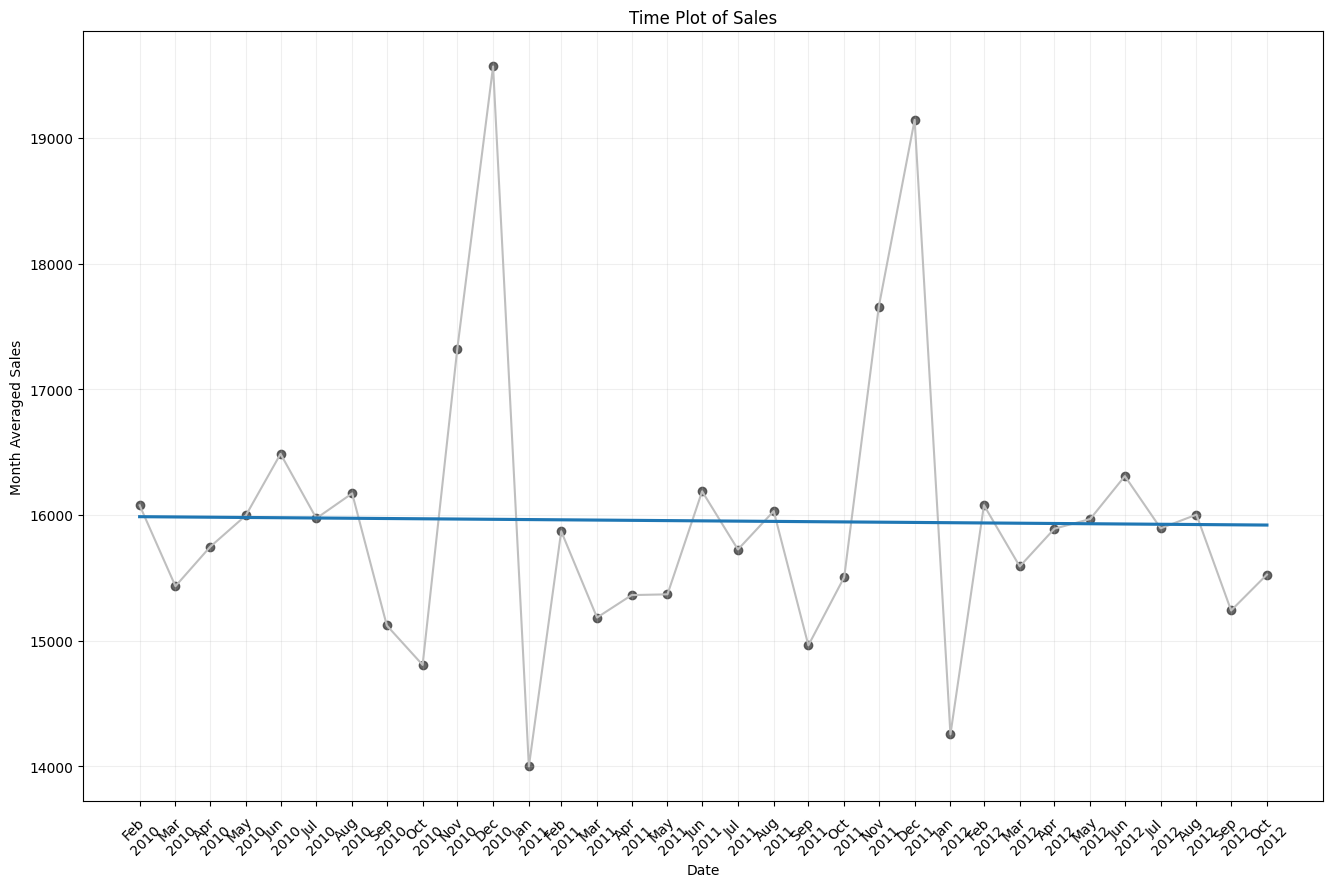

In [176]:
fig, ax = plt.subplots(figsize=(16, 10))

# Vẽ biểu đồ đường (line plot) thể hiện doanh số bán hàng trung bình hàng tháng
ax.plot('Date_Numeric', 'Weekly_Sales', data=monthlySales, color='0.75')

# Vẽ đồ thị hồi quy (regression plot) minh họa xu hướng tổng thể của doanh số theo thời gian
sns.regplot(x='Date_Numeric', y='Weekly_Sales', data=monthlySales, ci=None, scatter_kws={"color": "0.25"}, ax=ax)

ax.set_title('Time Plot of Sales')


# Thiết lập các vị trí của nhãn trục x
ax.set_xticks(monthlySales['Date_Numeric'])  # This sets ticks at the positions of Date_Numeric

# Định dạng lại nhãn trục x để hiển thị theo tháng và năm
ax.set_xticklabels([date.strftime('%b\n%Y') for date in monthlySales['Date']])

ax.set_xlabel('Date')
ax.set_ylabel('Month Averaged Sales')

plt.grid(True,alpha=0.2)
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()

Sự biến động trong doanh số có thể phản ánh các yếu tố mùa vụ hoặc các sự kiện đặc biệt trong năm (như lễ hội, khuyến mãi, hoặc các sự kiện bất ngờ).  
Đường hồi quy cho thấy xu hướng ổn định mà không có sự thay đổi mạnh mẽ qua thời gian, có thể cần có các yếu tố khác như chương trình khuyến mãi, giá sản phẩm, hoặc các yếu tố kinh tế vĩ mô để giải thích sự thay đổi lớn trong doanh số.

## Áp dụng trung bình động đơn giản cho dữ liệu hàng tháng


In [177]:
monthlySales.set_index('Date', inplace=True)

# Tính toán trung bình động 3 kỳ (SMA 3)
monthlySales['SMA_3'] = monthlySales['Weekly_Sales'].rolling(window=3).mean()

# Dự báo doanh số của kỳ tiếp theo
next_period_forecast = monthlySales['SMA_3'].iloc[-1]

print(f"The forecast for Nov 2012 sales is {next_period_forecast}")



The forecast for Nov 2012 sales is 15588.91624099263


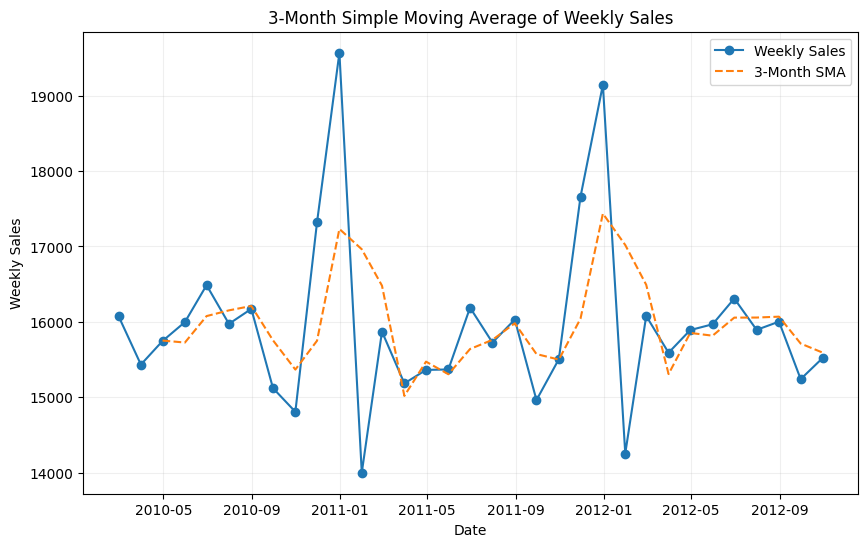

In [178]:
# Vẽ biểu đồ với doanh số bán hàng và đường trung bình động 3 kỳ (SMA 3)
plt.figure(figsize=(10, 6))
plt.plot(monthlySales.index, monthlySales['Weekly_Sales'],marker='o', label='Weekly Sales')
plt.plot(monthlySales.index, monthlySales['SMA_3'], label='3-Month SMA', linestyle='--')
plt.title('3-Month Simple Moving Average of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

Tổng quan:  
Biểu đồ so sánh doanh số bán hàng hàng tuần (Weekly Sales) với trung bình động 3 kỳ (3-Month SMA) từ tháng 5/2010 đến tháng 9/2012.
Doanh số dao động từ 14,000 đến 19,000 với nhiều biến động lớn.

Quan sát chính:  
Đường Weekly Sales: Biến động mạnh theo thời gian với các đỉnh lớn, phản ánh sự thay đổi ngắn hạn do sự kiện hoặc mùa vụ.  
Đường SMA: Mượt mà hơn, phản ánh xu hướng dài hạn, làm giảm tác động của các đột biến ngắn hạn.  
  
Biến động lớn: Doanh số tăng đột biến trong các tháng đặc biệt (sự kiện, khuyến mãi), giảm ở các giai đoạn thấp điểm (tháng 5/2011, 9/2012).  
Lợi ích của SMA: Làm rõ xu hướng tổng thể, hỗ trợ dự báo và đưa ra chiến lược ổn định hơn.

Biểu đồ cho thấy doanh số bị ảnh hưởng bởi yếu tố ngắn hạn (biến động) và yếu tố dài hạn (xu hướng), SMA giúp nhận diện xu hướng rõ hơn để hỗ trợ quản lý hiệu quả.

## Áp dụng ARIMA và Seasonal ARIMA cho doanh số bán hàng theo cửa hàng/bộ phận và trung bình trên


In [179]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Hàm kiểm tra tính dừng:
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))



## Từ các phần trước, chúng ta biết rằng Cửa hàng số 20 và Phòng ban số 92 có doanh số bán hàng cao nhất

In [180]:
maxDF = mergedDF[(mergedDF['Store'] == 20) & (mergedDF['Dept'] == 92)]
maxDF.set_index('Date',inplace=True)

In [181]:
timeSeries = maxDF['Weekly_Sales']

check_stationarity(timeSeries)


#  Áp dụng differencing
timeSeries_diff = timeSeries.diff().dropna()

ADF Statistic: -1.524424
p-value: 0.521397
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


Chuỗi thời gian không dừng: Vì ADF Statistic lớn hơn các Critical Values ở mức 1%, 5%, và 10%, và p-value lớn hơn 0.05, ta kết luận rằng chuỗi thời gian không dừng.  
Cần differencing: Để làm cho chuỗi thời gian trở thành dừng (stationary), cần phải thực hiện differencing (sự khác biệt) với chuỗi thời giah, tức là tạo ra chuỗi thời gian thay đổi giữa các giá trị liên tiếp (thực hiện phép trừ giữa giá trị của một tháng và giá trị của tháng trước đó).

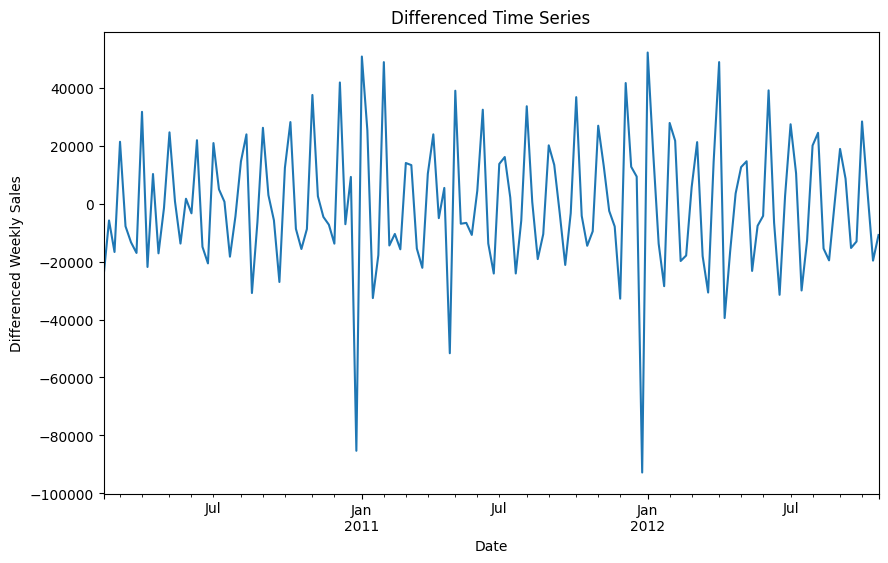

<Figure size 1000x600 with 0 Axes>

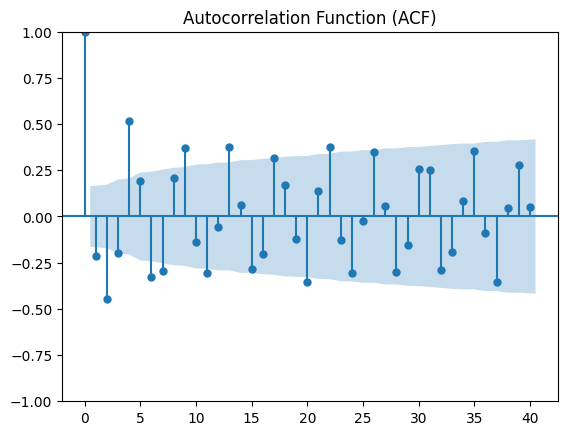

<Figure size 1000x600 with 0 Axes>

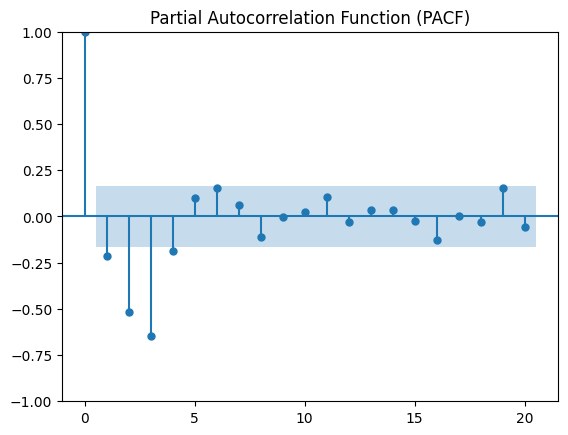

In [182]:
# Vẽ chuỗi thời gian đã thực hiện phép trừ (Differenced Series)
plt.figure(figsize=(10, 6))
timeSeries_diff.plot()
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Weekly Sales')
plt.show()

# Vẽ hàm tự tương quan (ACF - Autocorrelation Function)
plt.figure(figsize=(10, 6))
plot_acf(timeSeries_diff, lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Vẽ hàm tự tương quan riêng biệt (PACF - Partial Autocorrelation Function)
plt.figure(figsize=(10, 6))
plot_pacf(timeSeries_diff, lags=20, alpha=0.05, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

1. Biểu đồ Hàm Tự Tương Quan (ACF):  
Quan sát:  
ACF giảm dần: Hàm tự tương quan ban đầu tại độ trễ 0 rất cao (gần 1), nhưng sau đó giảm dần và trở nên ổn định. Điều này có thể cho thấy tự tương quan ngắn hạn trong chuỗi thời gian.

2. Biểu đồ Hàm Tự Tương Quan Riêng Biệt (PACF):
Quan sát:
PACF có các đỉnh rõ rệt: Tại độ trễ 1, có một đỉnh cao, sau đó các giá trị tương quan giảm dần, và hầu hết các độ trễ khác có giá trị tự tương quan gần bằng 0. Điều này có thể cho thấy mô hình ARIMA cần một bậc AR (p=1), vì độ trễ 1 có sự tự tương quan rõ rệt, trong khi các độ trễ tiếp theo không có nhiều ảnh hưởng.

Kết luận:
ACF: Đoạn ACF cho thấy có sự tự tương quan ngắn hạn, cho thấy rằng chuỗi thời gian có thể có tính tự hồi quy.
PACF: Biểu đồ PACF cho thấy độ trễ 1 có sự tự tương quan mạnh mẽ, ngoài ra lag 2 và lag 3 đều vượt qua ngưỡng ý nghĩa, gợi ý rằng mô hình ARIMA có thể cần một bậc AR (p = 1 hoặc 2 hoặc 3).


In [183]:
check_stationarity(timeSeries_diff)

ADF Statistic: -13.616157
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


Chuỗi thời gian đã trở thành dừng: Vì ADF Statistic rất nhỏ và p-value rất nhỏ (dưới 0.05)

## p = 3 từ biểu đồ PACF
## d = 1 vì chúng ta đã thực hiện phép lấy sai phân một lần
## q = 4 hoặc 6 dựa trên các giá trị cao trong biểu đồ ACF

Không chọn p = 1 và q = 1 vì:
Chúng không phản ánh đúng đặc điểm tự tương quan của dữ liệu (dựa trên ACF và PACF).
Mô hình sẽ bị underfitting, bỏ qua các mối quan hệ quan trọng trong chuỗi thời gian.

ARIMA(3, 1, 4) là mô hình phù hợp hơn vì: (đã có kiểm tra)
Có AIC, BIC, và HQIC thấp hơn.
Đơn giản hơn (ít tham số hơn) mà vẫn đạt được hiệu quả tương đương với ARIMA(4, 1, 4).
Các chỉ số kiểm tra phần dư (Ljung-Box) cho thấy phần dư độc lập hơn.

In [184]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Chia dữ liệu thành tập huấn luyện và kiểm tra
split_point = int(len(timeSeries) * 0.75)
train, test = timeSeries[0:split_point], timeSeries[split_point:]

# Step 2: Define ARIMA parameters (example: p=1, d=0, q=1)
p, d, q = 3, 1, 4

# Step 3: Fit the ARIMA model on the training set
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())




                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -1176.362
Date:                Sat, 16 Nov 2024   AIC                           2368.723
Time:                        14:53:29   BIC                           2390.031
Sample:                    02-05-2010   HQIC                          2377.359
                         - 02-17-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7192      0.447     -1.610      0.107      -1.594       0.156
ar.L2         -0.7465      0.112     -6.648      0.000      -0.967      -0.526
ar.L3         -0.9764      0.444     -2.199      0.0

Mô hình ARIMA(3, 1, 4) dường như phù hợp với dữ liệu, vì p-value của các hệ số AR(2), AR(3), MA(4) đều nhỏ hơn 0.05, cho thấy các hệ số này có ý nghĩa thống kê và đóng vai trò quan trọng trong việc giải thích dữ liệu.  
Kiểm tra Ljung-Box: Giá trị Prob(Q) = 0.72 > 0.05 cho thấy rằng phần dư không còn tự tương quan, điều này khẳng định mô hình đã giải thích tốt cấu trúc dữ liệu.
Kiểm tra Heteroskedasticity: Giá trị Prob(H) = 0.71 > 0.05 cho thấy phần dư có phương sai đồng nhất, chứng tỏ mô hình ổn định.

Mô hình ARIMA(3, 1, 4): Là mô hình phù hợp với dữ liệu. Mô hình giải thích tốt các mẫu dữ liệu quan trọng (thông qua các hệ số có ý nghĩa thống kê).  



In [185]:
# Dự báo với mô hình ARIMA
predictions = model_fit.forecast(steps=len(test))

# Đánh giá mô hình bằng cách tính MSE và RMSE
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15357.575


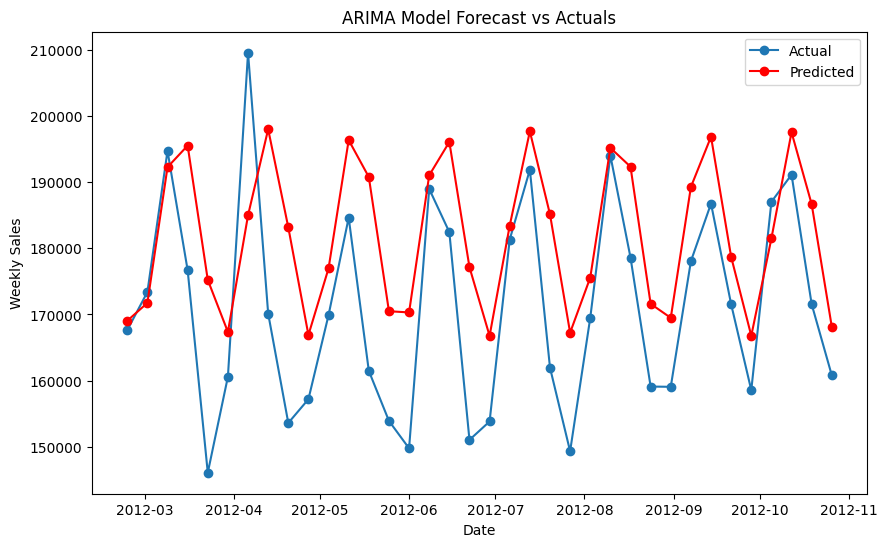

In [186]:
# Vẽ biểu đồ so sánh dự báo và giá trị thực tế
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, marker='o', label='Actual')
plt.plot(test.index, predictions, marker='o', color='red', label='Predicted')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

Tương đồng giữa Actual và Predicted:  
Đường dự báo (Predicted) và đường thực tế (Actual) có xu hướng chung tương tự nhau, tức là:  
Cả hai cùng tăng và giảm tại các thời điểm chính.  
Mô hình đã nắm bắt được phần lớn các xu hướng biến động của dữ liệu.  

Sai lệch ở các đỉnh và đáy:  
Có một số sai lệch đáng kể ở các điểm cực trị:  
Ví dụ: Tháng 4/2012 và tháng 9/2012, dự báo thấp hơn so với thực tế. Tháng 6/2012, dự báo cao hơn thực tế.  
Điều này có thể cho thấy mô hình gặp khó khăn trong việc dự đoán các đột biến mạnh (spikes) trong dữ liệu.  

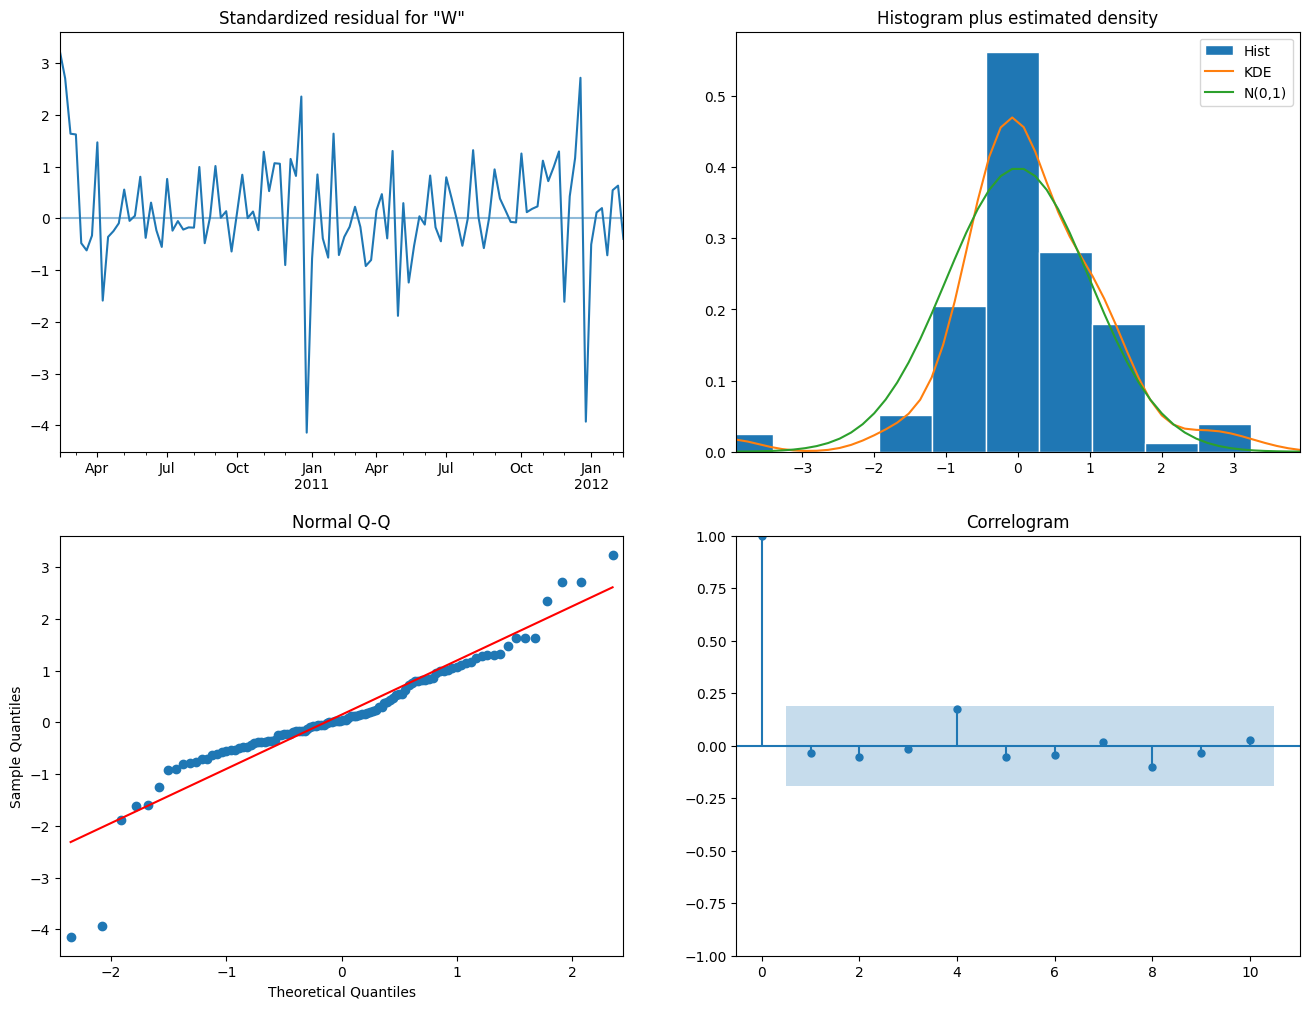

In [187]:
model_fit.plot_diagnostics(figsize=(16,12));

1. Biểu đồ Residuals Standardized ("W"):  
Phần dư có sự biến động mạnh, có một số điểm có giá trị cực đại (ví dụ: vào tháng 1, 2011).  
Nếu phần dư có sự biến động lớn và không đồng nhất, có thể chỉ ra rằng mô hình chưa bắt được hết các yếu tố trong dữ liệu hoặc dữ liệu có sự thay đổi lớn tại một số điểm.  

2. Biểu đồ Histogram cộng với mật độ ước tính:  
Phần dư không hoàn toàn tuân theo phân phối chuẩn, nhưng vẫn gần gũi. Tuy nhiên, có một số điểm lệch ra ngoài phân phối chuẩn.  
Phần dư có vẻ phân bố không hoàn hảo (không hoàn toàn đối xứng và có một số điểm xa so với phân phối chuẩn), điều này có thể chỉ ra rằng mô hình ARIMA chưa bắt được tất cả các yếu tố trong dữ liệu.

3. Biểu đồ Q-Q Plot:  
Các điểm gần đường chéo nhưng có vài điểm xa ra ngoài đường chéo, điều này cho thấy phần dư gần như tuân theo phân phối chuẩn nhưng có một số điểm lệch lạc. Đây có thể là dấu hiệu của các yếu tố ngoài dự báo mà mô hình chưa bắt được.  

4. Biểu đồ ACF (Autocorrelation Function) của Residuals:  
Các điểm trên đồ thị đều nằm trong khoảng tin cậy, điều này cho thấy rằng không có sự tự tương quan giữa phần dư tại các độ trễ. Điều này cho thấy mô hình ARIMA đã bắt được các mẫu quan trọng trong dữ liệu.  
            
5. Tóm lại:  
Phần dư chuẩn hóa có một số biến động lớn và có thể cần được cải thiện.  
Biểu đồ histogram và Q-Q cho thấy phần dư gần với phân phối chuẩn nhưng vẫn có sự sai lệch.  
Biểu đồ ACF cho thấy mô hình ARIMA đã bắt được tất cả các yếu tố trong dữ liệu, vì không có sự tự tương quan mạnh trong phần dư.  
Mô hình ARIMA có vẻ đã dự đoán khá tốt dữ liệu, nhưng phần dư vẫn cho thấy một số bất thường. Có thể cần cải thiện mô hình bằng cách thử nghiệm các tham số ARIMA khác.  

In [188]:
#tìm và chọn mô hình ARIMA cho dữ liệu chuỗi thời gian train và hiển thị thông tin tóm tắt của mô hình để đánh giá hiệu quả của nó
import pmdarima as pm
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1186.954
Date:                Sat, 16 Nov 2024   AIC                           2385.908
Time:                        14:53:33   BIC                           2401.888
Sample:                    02-05-2010   HQIC                          2392.385
                         - 02-17-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    494.3981   1202.992      0.411      0.681   -1863.422    2852.219
ar.L1         -0.4682      0.098     -4.793      0.000      -0.660      -0.277
ar.L2         -0.5359      0.053    -10.051      0.000      -0.640      -0.431
ar.L3         -0.4255      0.040    -10.699      0.000      -0.503      -0.348
ma.L1         -0.3078      0.123     -2.509      0.012      -0.548      -0.067
sigma2      2.344e+08      0.007   3.25e+10      0.000    2.34e+08    2.34e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):                30.80
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.21
Prob(H) (two-sided):                  0.35   Kurtosis:                         5.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+26. Standard errors may be unstable.
"""

In [189]:
predictions_auto = auto_arima.predict(steps=len(test))

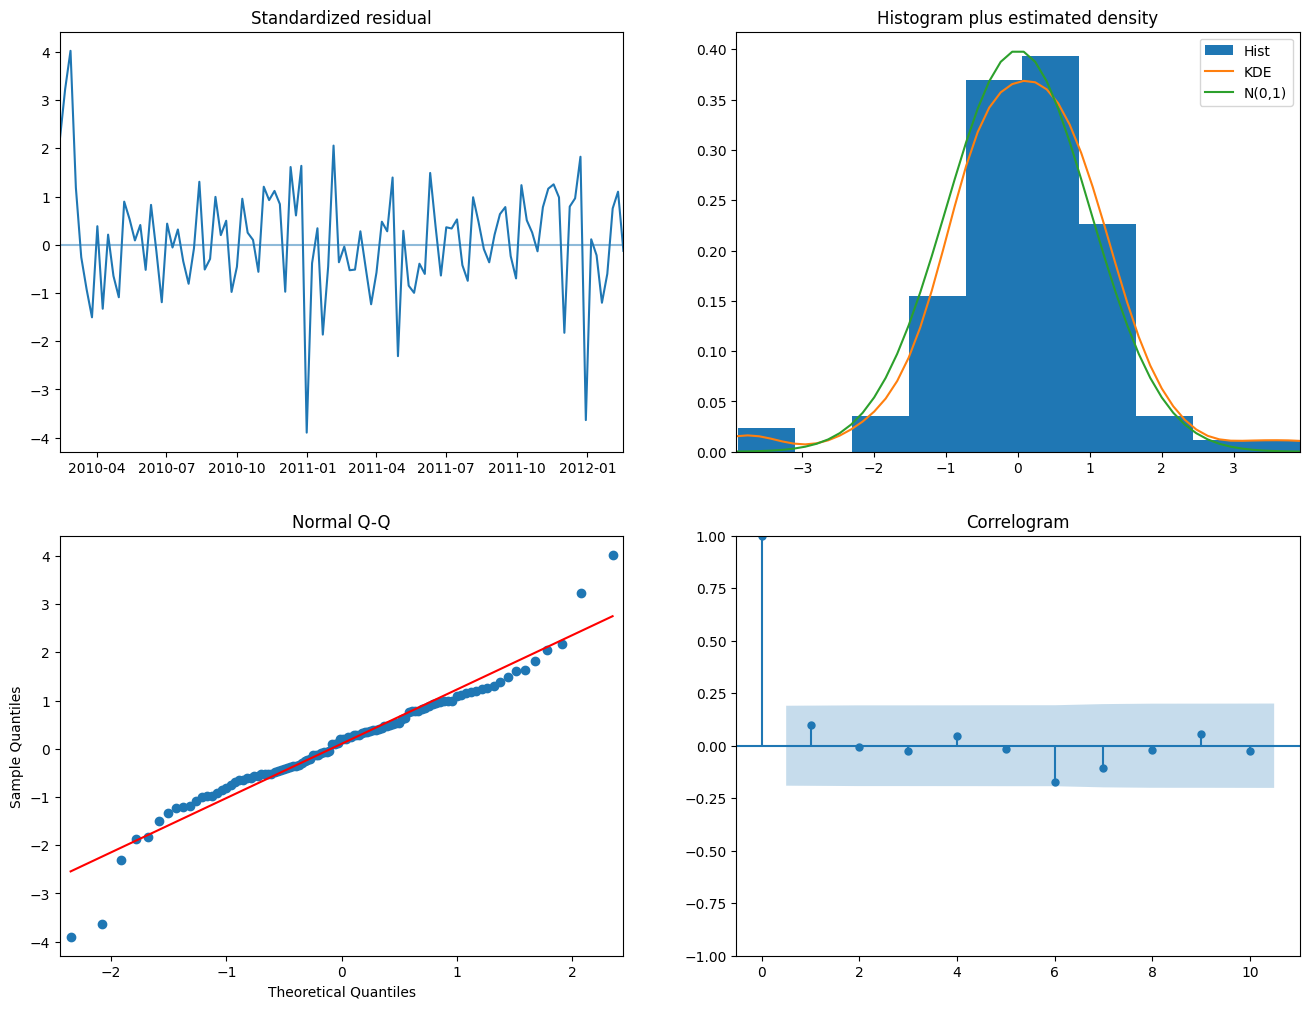

In [190]:
auto_arima.plot_diagnostics(figsize=(16,12));

1. Biểu đồ Residuals Standardized (Phần dư chuẩn hóa):  
Các phần dư có sự dao động mạnh, đặc biệt là vào các tháng như Tháng 1, 2011.
Đây có thể là dấu hiệu cho thấy mô hình chưa hoàn toàn khớp với dữ liệu hoặc có sự thay đổi đột ngột trong dữ liệu (các biến cố hoặc sự kiện lớn), điều này khiến phần dư lớn bất thường.
Nhìn chung, phần dư có sự biến động, điều này có thể chỉ ra rằng có một số yếu tố chưa được mô hình giải thích.  

2. Biểu đồ Histogram cộng với mật độ ước tính (Histogram plus estimated density):  
Phân phối phần dư có xu hướng gần giống phân phối chuẩn (phân phối chuông), với một số điểm lệch ra ngoài, điều này chỉ ra rằng phần dư có thể gần với phân phối chuẩn nhưng không hoàn toàn.
KDE (mật độ ước tính) có dạng tương tự phân phối chuẩn, nhưng sự khác biệt vẫn tồn tại. Điều này có thể chỉ ra rằng phần dư không hoàn toàn tuân theo phân phối chuẩn và mô hình ARIMA có thể chưa bắt được toàn bộ yếu tố trong dữ liệu.

3. Biểu đồ Q-Q Plot (Quantile-Quantile Plot):  
Phần dư nhìn chung nằm gần đường chéo, nhưng có vài điểm xa ra ngoài, đặc biệt là ở các phần dư cực đại và cực tiểu.  
Điều này chỉ ra rằng phần dư có thể gần với phân phối chuẩn nhưng không hoàn toàn phù hợp, một số điểm có sự khác biệt lớn so với phân phối chuẩn.  

4. Biểu đồ ACF (Autocorrelation Function) của Residuals:  
Biểu đồ này kiểm tra sự tự tương quan giữa phần dư tại các độ trễ (lags). Nếu mô hình đã bắt được hết các mẫu trong dữ liệu, các điểm trong đồ thị nên nằm trong khoảng tin cậy (hộp mờ).

Nhận xét:
Các điểm trên đồ thị nằm trong khoảng tin cậy (confidence interval), cho thấy rằng không có sự tự tương quan đáng kể trong phần dư.
Điều này là tín hiệu tốt, chỉ ra rằng mô hình ARIMA đã bắt được các yếu tố trong dữ liệu và phần dư là ngẫu nhiên, không có mối quan hệ rõ rệt giữa các phần dư tại các độ trễ khác nhau.
Phần dư có sự biến động mạnh và không hoàn toàn tuân theo phân phối chuẩn, điều này có thể chỉ ra rằng mô hình ARIMA chưa bắt được hết các yếu tố trong dữ liệu (chẳng hạn như sự thay đổi lớn hoặc yếu tố ngoài dự báo).
Tuy nhiên, mô hình không có sự tự tương quan trong phần dư, điều này cho thấy mô hình đã giải thích được các mẫu quan trọng trong dữ liệu.

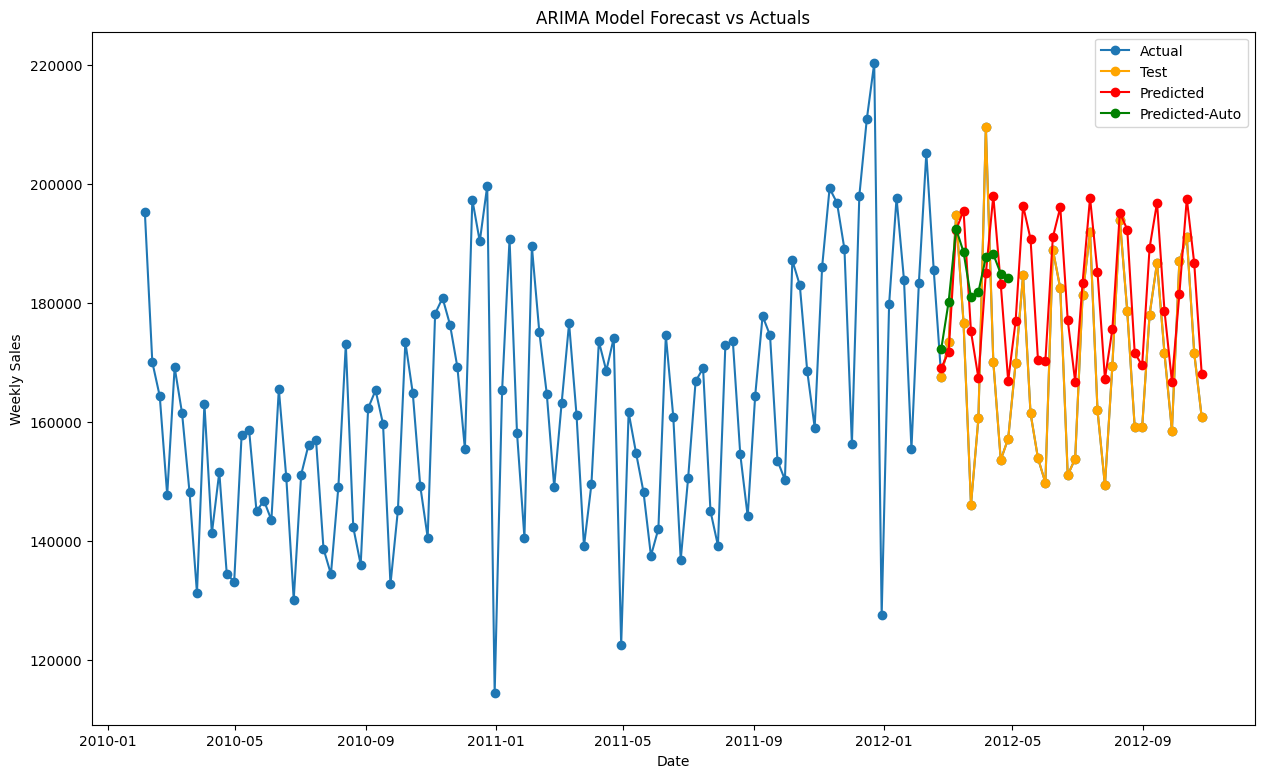

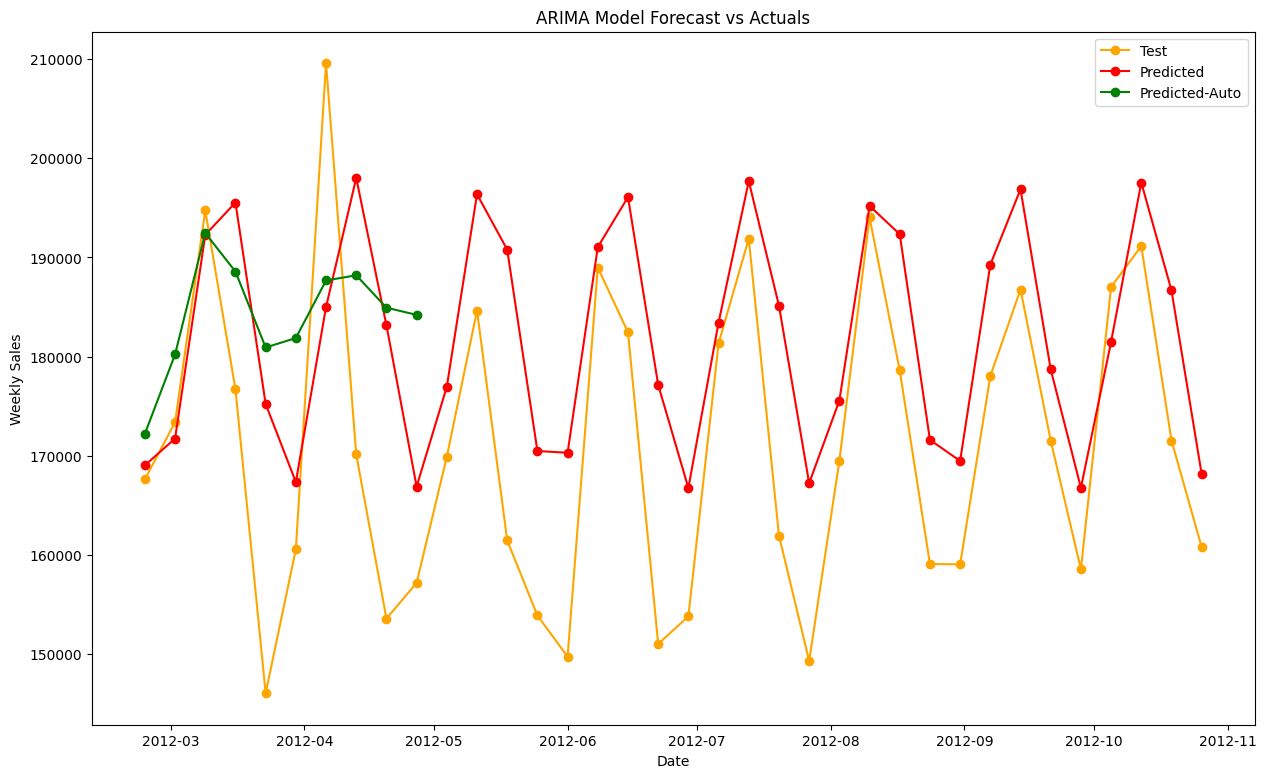

In [212]:
plt.figure(figsize=(15, 9))

# Dữ liệu thực tế
plt.plot(timeSeries.index, timeSeries, marker='o', label='Actual')

# Dữ liệu kiểm tra
plt.plot(test.index, test, marker='o', color='orange', label='Test')

# Dự đoán thủ công
plt.plot(test.index, predictions, marker='o', color='red', label='Predicted')

# Dự đoán tự động (khớp trục x)
plt.plot(test.index[:len(predictions_auto)], predictions_auto, marker='o', color='green', label='Predicted-Auto')

plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


plt.figure(figsize=(15, 9))

# Dữ liệu kiểm tra
plt.plot(test.index, test, marker='o', color='orange', label='Test')

# Dự đoán thủ công
plt.plot(test.index, predictions, marker='o', color='red', label='Predicted')

# Dự đoán tự động (khớp trục x)
plt.plot(test.index[:len(predictions_auto)], predictions_auto, marker='o', color='green', label='Predicted-Auto')

plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


### Conclusions:

Khi so sánh với tập kiểm tra, kết quả của Auto-ARIMA tệ hơn so với phiên bản được điều chỉnh thủ công.
Mô hình ARIMA điều chỉnh thủ công thể hiện tính linh hoạt cao hơn trong việc thích nghi với toàn bộ tập dữ liệu kiểm tra, khiến nó phù hợp hơn cho các dự đoán dài hạn.
Mặc dù cả hai mô hình đều nắm bắt được xu hướng tổng thể, phiên bản điều chỉnh thủ công cho thấy sự phù hợp tốt hơn với các dao động lớn, mặc dù vẫn có một số sai số.

<Figure size 2000x1200 with 0 Axes>

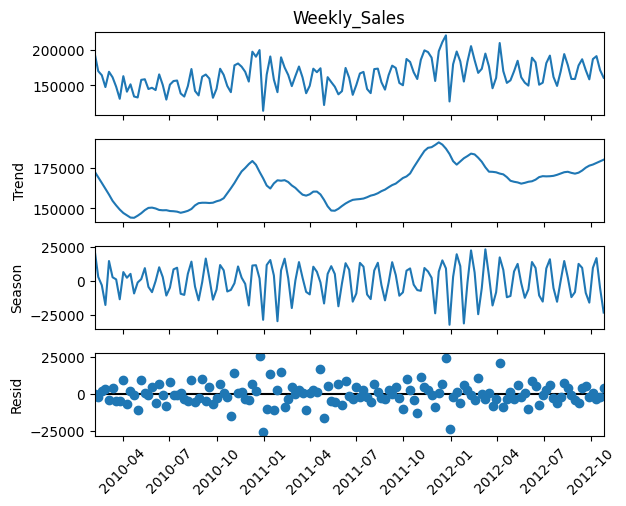

In [192]:
from statsmodels.tsa.seasonal import STL

res = STL(timeSeries,period=4).fit()

plt.figure(figsize=(20, 12)) 
res.plot()
plt.xticks(rotation=45)  # Xoay nhãn năm trên trục x 45 độ
plt.show()


Biểu đồ trên cho thấy phân tích chuỗi thời gian của Weekly Sales qua bốn thành phần chính:

Weekly Sales (Dữ liệu gốc): Dòng trên cùng biểu thị chuỗi dữ liệu gốc của Weekly Sales. Ta có thể thấy dữ liệu có xu hướng tăng hoặc giảm theo thời gian với các biến động lớn và những đợt tăng giảm đột ngột, điều này gợi ý rằng có sự ảnh hưởng của các yếu tố mùa vụ hoặc các sự kiện đặc biệt.

Trend (Xu hướng): Dòng thứ hai là xu hướng trong chuỗi thời gian, đây là sự thay đổi dài hạn của dữ liệu. Dễ dàng nhận thấy rằng có một xu hướng tăng dần trong thời gian từ 2010 đến 2012, với một số dao động nhẹ. Điều này có thể cho thấy rằng Weekly Sales có xu hướng tăng dần theo thời gian, có thể là do sự tăng trưởng chung trong doanh thu hoặc các yếu tố dài hạn khác.

Season (Mùa vụ): Dòng thứ ba chỉ ra phần mùa vụ trong chuỗi dữ liệu, biểu thị các yếu tố theo chu kỳ, ví dụ như thay đổi theo mùa. Biểu đồ này cho thấy một chu kỳ rõ rệt, với sự tăng giảm đều đặn mỗi năm, có thể là sự thay đổi doanh thu theo các mùa hoặc các sự kiện đặc biệt như lễ hội hoặc khuyến mãi. Đặc biệt, các đỉnh cao và đáy thường xuyên xuất hiện có thể chỉ ra sự biến động theo mùa của doanh thu.

Resid (Dư thừa): Dòng cuối cùng là phần dư thừa (residuals), tức là phần còn lại sau khi đã loại bỏ xu hướng và mùa vụ. Phần dư thừa này thường có dạng ngẫu nhiên và không có mô hình rõ ràng. Việc phần dư thừa không có xu hướng và có phân bố đồng đều xung quanh 0 cho thấy rằng mô hình đã phân tách thành công các yếu tố xu hướng và mùa vụ. Mục tiêu là để phần dư thừa không có sự phụ thuộc vào thời gian.

Nhận xét tổng quát:
Xu hướng cho thấy doanh số bán hàng có xu hướng tăng trưởng theo thời gian, điều này có thể phản ánh sự phát triển của từng cửa hàng hoặc sự tăng trưởng chung.
Mùa vụ cho thấy có những dao động theo chu kỳ, có thể do các yếu tố theo mùa hoặc các chương trình khuyến mãi.
Phần dư thừa không có mô hình rõ rệt, điều này chứng tỏ rằng chuỗi thời gian đã được phân tích thành công và điều này có nghĩa là mô hình đã giải thích được hầu hết các yếu tố có thể dự đoán (trend và seasonality).

<Figure size 1000x600 with 0 Axes>

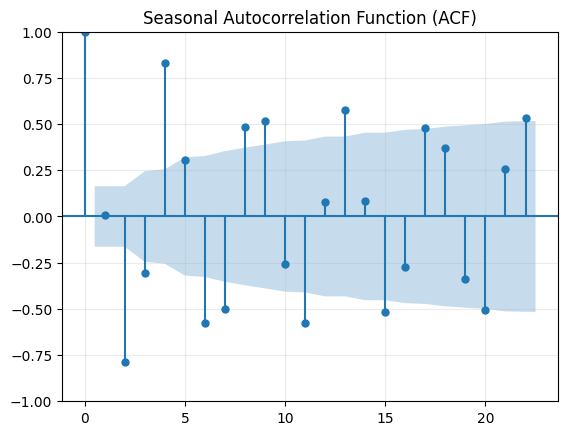

<Figure size 1000x600 with 0 Axes>

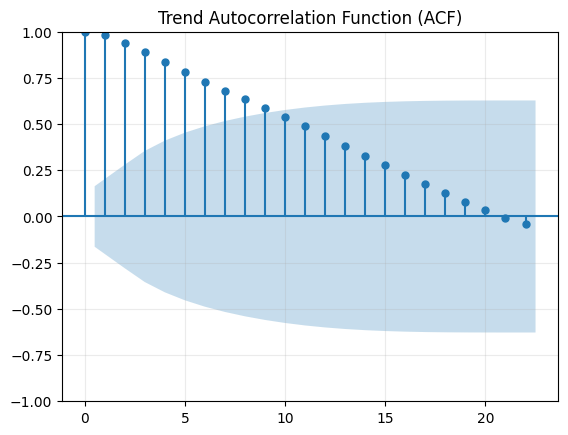

In [193]:
# Tạo biểu đồ ACF (Autocorrelation Function) cho thành phần seasonal
plt.figure(figsize=(10, 6))
plot_acf(res.seasonal, alpha=0.05) # Vẽ biểu đồ ACF cho thành phần seasonal với mức ý nghĩa 5%
plt.title('Seasonal Autocorrelation Function (ACF)')
plt.grid(True,alpha=0.25)
plt.show()

# Tạo biểu đồ ACF (Autocorrelation Function) cho thành phần trend
plt.figure(figsize=(10, 6))
plot_acf(res.trend, alpha=0.05)  # Vẽ biểu đồ ACF cho thành phần trend với mức ý nghĩa 5%
plt.title('Trend Autocorrelation Function (ACF)')
plt.grid(True,alpha=0.25)
plt.show()

1. Biểu đồ Seasonal Autocorrelation Function (ACF)  
Có tính mùa vụ rõ rệt: Các điểm nằm ngoài vùng tin cậy (bounded by the blue shaded area) tại các lag theo mùa (ví dụ, lag 4, 8, 12,...) cho thấy có một mối tương quan tự động mạnh giữa các giá trị cách nhau một khoảng thời gian bằng chu kỳ mùa, cho thấy ảnh hưởng của các yếu tố theo mùa.  
Tương quan cao ở các lag theo mùa: Các giá trị cách nhau một khoảng thời gian bằng chu kỳ mùa có liên hệ chặt chẽ với nhau.

2. Biểu đồ ACF (Trend Autocorrelation Function)  
Tương quan mạnh và kéo dài: Các giá trị dữ liệu có mối liên hệ chặt chẽ với nhau trong một khoảng thời gian dài. Điều này thể hiện qua các cột ACF cao và nằm ngoài vùng tin cậy (khu vực màu xanh) ở nhiều lag khác nhau.  
Xu hướng tăng: Dữ liệu có xu hướng tăng dần theo thời gian. Điều này được thể hiện qua các giá trị ACF ban đầu thường cao và giảm dần về sau.  
Ít tính mùa vụ: Không có các đỉnh cao rõ rệt và đều đặn xuất hiện ở các khoảng lag nhất định, cho thấy dữ liệu ít chịu ảnh hưởng của yếu tố mùa vụ.  

In [194]:
import itertools
import statsmodels.api as sm

# Khởi tạo các giá trị cho các tham số p, d, q trong mô hình ARIMA
p = q = range(0, 3) # Giá trị của p và q trong khoảng từ 0 đến 2
d = range(0,2)  # Giá trị của d trong khoảng từ 0 đến 1

# Tạo tất cả các tổ hợp có thể có của các tham số (p, d, q)
pdq = list(itertools.product(p, d, q))

# Tạo các tổ hợp (p, d, q, s) cho mô hình SARIMA, với s là yếu tố mùa vụ (chu kỳ 4)
pdqs = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

# Định nghĩa hàm để thực hiện Grid Search trên các tham số SARIMA
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=200, freq='W'):
    '''
    Đầu vào:
        ts : Chuỗi thời gian (time series) cần dự báo
        pdq : Các tổ hợp tham số ARIMA (p, d, q) được tạo ra từ trước
        pdqs : Các tổ hợp tham số mùa vụ SARIMA (p, d, q, s) được tạo ra từ trước
        maxiter : Số lần lặp tối đa khi fitting mô hình (default=200). Tăng nếu mô hình không hội tụ.
        freq : Tần suất của dữ liệu chuỗi thời gian (default='W' - hàng tuần). 
               Thay đổi giá trị phù hợp với dữ liệu như 'D' (ngày), 'M' (tháng), 'Y' (năm).
        
    Đầu ra:
        In ra 5 tổ hợp tham số tốt nhất dựa trên chỉ số BIC.
        Trả về DataFrame chứa các tổ hợp tham số được sắp xếp theo chỉ số BIC tăng dần.
    '''

    # Chạy grid search với các tổ hợp tham số pdq và pdqs, lấy giá trị BIC tốt nhất
    ans = []
    for comb in pdq: # Duyệt qua từng tổ hợp (p, d, q)
        for combs in pdqs: # Duyệt qua từng tổ hợp (p, d, q, s) cho yếu tố mùa vụ
            try:
                # Khởi tạo mô hình SARIMAX với tham số (p, d, q) và (p, d, q, s)
                mod = sm.tsa.statespace.SARIMAX(ts, # Chuỗi thời gian
                                                order=comb, # Tham số ARIMA (p, d, q)
                                                seasonal_order=combs) # Tham số mùa vụ SARIMA (p, d, q, s)
                 # Huấn luyện mô hình
                output = mod.fit(maxiter=maxiter) 
                # Lưu tham số và giá trị BIC vào danh sách
                ans.append([comb, combs, output.bic])

                # In ra thông tin tham số và giá trị BIC đã tính được
                print('SARIMAX {} x {} : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue

    # Chuyển kết quả từ danh sách sang DataFrame
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sắp xếp DataFrame theo giá trị BIC (tăng dần) và lấy top 5 tổ hợp tham số tốt nhất
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df

In [195]:
sarimax_gridsearch(timeSeries, pdq, pdqs, freq='W')

SARIMAX (0, 0, 0) x (0, 0, 0, 4) : BIC Calculated =3848.136495038
SARIMAX (0, 0, 0) x (0, 0, 1, 4) : BIC Calculated =3760.0686913742356
SARIMAX (0, 0, 0) x (0, 0, 2, 4) : BIC Calculated =3746.177748298949
SARIMAX (0, 0, 0) x (0, 1, 0, 4) : BIC Calculated =3091.9860248420755
SARIMAX (0, 0, 0) x (0, 1, 1, 4) : BIC Calculated =3091.313420399294
SARIMAX (0, 0, 0) x (0, 1, 2, 4) : BIC Calculated =3095.9727002866925
SARIMAX (0, 0, 0) x (1, 0, 0, 4) : BIC Calculated =3204.488347307378
SARIMAX (0, 0, 0) x (1, 0, 1, 4) : BIC Calculated =3209.702546783297
SARIMAX (0, 0, 0) x (1, 0, 2, 4) : BIC Calculated =3214.2003246796385
SARIMAX (0, 0, 0) x (1, 1, 0, 4) : BIC Calculated =3091.670811818516
SARIMAX (0, 0, 0) x (1, 1, 1, 4) : BIC Calculated =3094.6434221664663
SARIMAX (0, 0, 0) x (1, 1, 2, 4) : BIC Calculated =3099.4415259052594
SARIMAX (0, 0, 0) x (2, 0, 0, 4) : BIC Calculated =3208.7515310246667
SARIMAX (0, 0, 0) x (2, 0, 1, 4) : BIC Calculated =3218.5415427501284
SARIMAX (0, 0, 0) x (2, 0, 2,

pdq          pdqs          bic
147  (1, 0, 2)  (0, 1, 0, 4)  3089.516934
237  (2, 0, 1)  (0, 1, 0, 4)  3090.748048
4    (0, 0, 0)  (0, 1, 1, 4)  3091.313420
9    (0, 0, 0)  (1, 1, 0, 4)  3091.670812
3    (0, 0, 0)  (0, 1, 0, 4)  3091.986025

                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  107
Model:             SARIMAX(1, 0, 2)x(0, 1, [], 4)   Log Likelihood               -1174.441
Date:                            Sat, 16 Nov 2024   AIC                           2356.882
Time:                                    14:55:53   BIC                           2367.302
Sample:                                02-05-2010   HQIC                          2361.099
                                     - 02-17-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1400      0.138      8.243      0.000       0.869       1.411
ma.L1          1.6589      0.088   

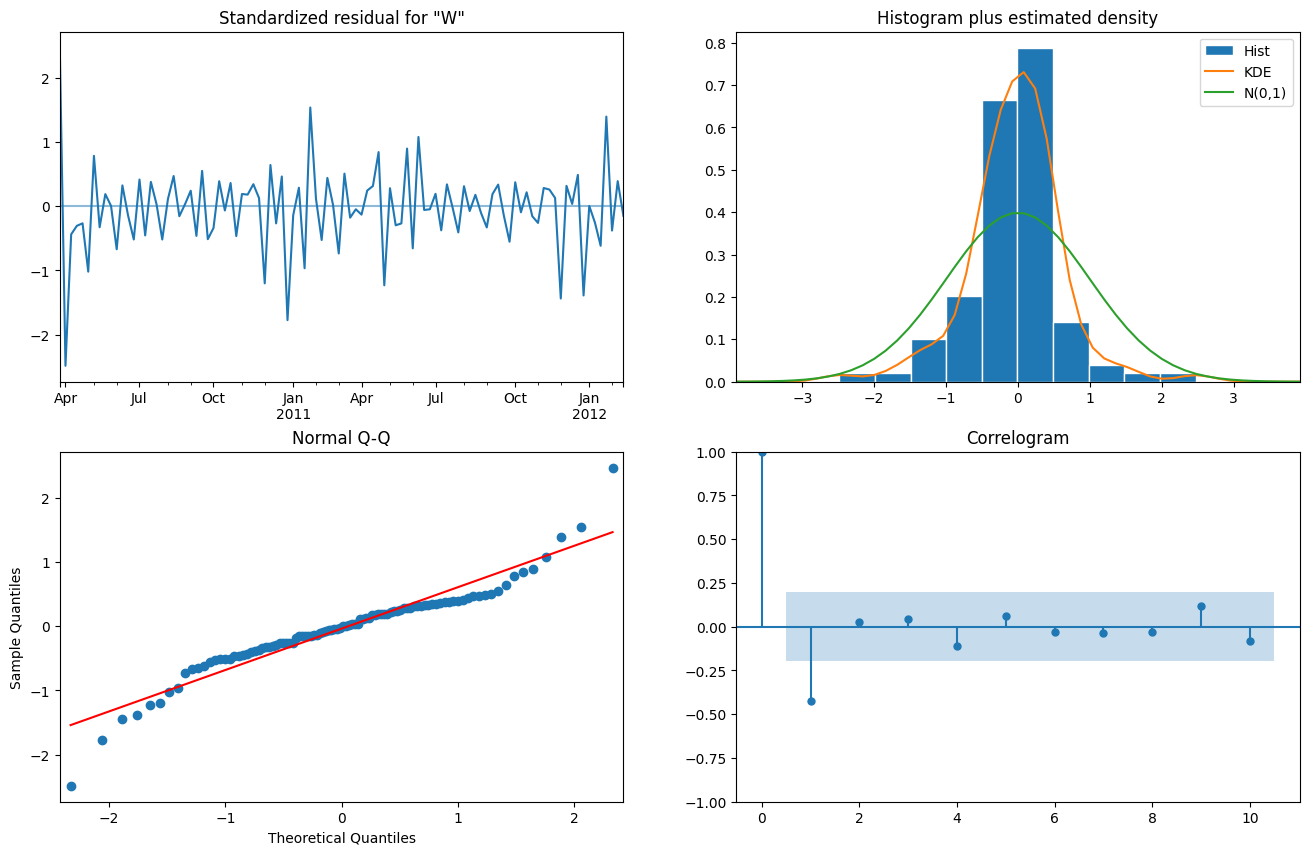

In [196]:
# Xây dựng mô hình SARIMAX với các tham số tối ưu
sarimax = sm.tsa.statespace.SARIMAX(train, 
                                    order=(1,0,2), 
                                    seasonal_order=(0,1,0,4), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False)
                                    
# Huấn luyện mô hình
output = sarimax.fit()
    
# In ra bảng tóm tắt kết quả của mô hình
print(output.summary())

# Vẽ biểu đồ chẩn đoán (diagnostics) để đánh giá mô hình
output.plot_diagnostics(figsize=(16,10));

Ưu điểm:  
Mô hình đã xác định các tham số ARIMA và yếu tố mùa vụ hợp lý.
Các tham số AR và MA đều có ý nghĩa thống kê.
Log-Likelihood (-1174.441) và AIC (2356.882) là hợp lý, nhưng có thể cải thiện.

Hạn chế:  
Phần dư không tuân theo phân phối chuẩn (Jarque-Bera Test).
Vẫn tồn tại tự tương quan trong phần dư (Ljung-Box Test), cần xử lý để cải thiện mô hình.
Dấu hiệu phương sai thay đổi (Heteroskedasticity) có thể ảnh hưởng đến kết quả. 

Những kết quả này cho thấy mô hình đã nắm bắt được các mẫu quan trọng trong dữ liệu, nhưng có thể có một số vấn đề với tự tương quan phần dư và không tuân theo phân phối chuẩn. 

In [197]:
predictions_sarima = output.predict(start=33,end=43)

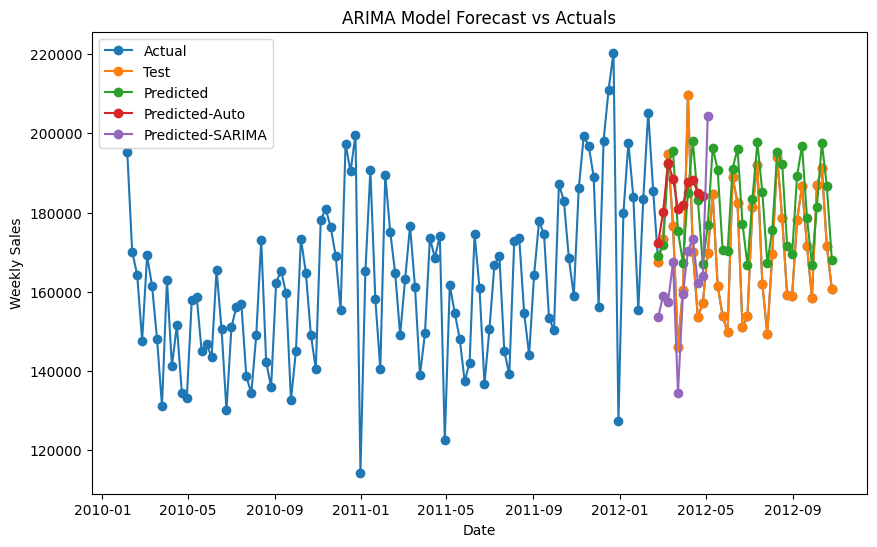

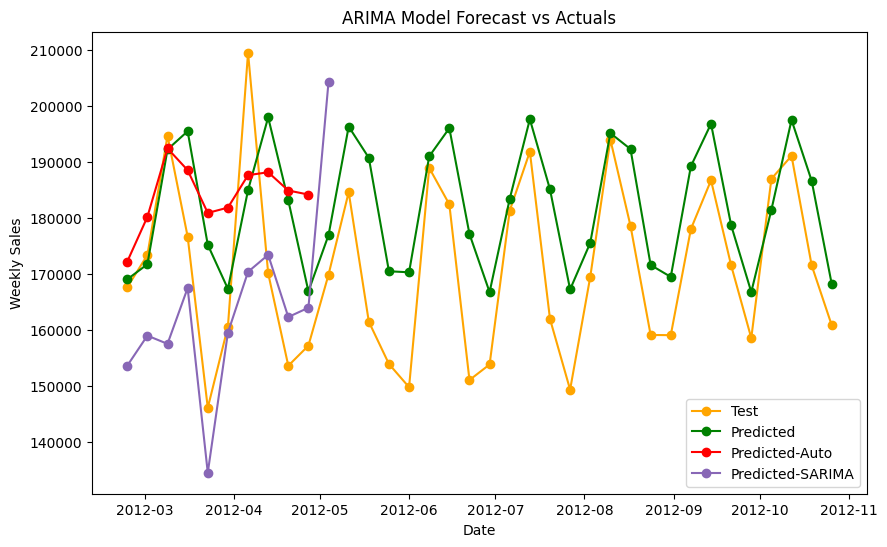

In [211]:
# Vẽ biểu đồ so sánh giữa giá trị thực tế và các giá trị dự đoán từ các mô hình
plt.figure(figsize=(10, 6))
plt.plot(timeSeries.index, timeSeries, marker='o', label='Actual')
plt.plot(test.index, test, marker='o', label='Test')
plt.plot(test.index, predictions, marker='o', label='Predicted')
plt.plot(test.index[:len(predictions_auto)], predictions_auto, marker='o', label='Predicted-Auto')
plt.plot(test.index[:len(predictions_sarima)], predictions_sarima, marker='o', label='Predicted-SARIMA')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Vẽ biểu đồ khác để so sánh chi tiết hơn giữa giá trị kiểm tra và dự đoán
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, marker='o', color='orange', label='Test')
plt.plot(test.index, predictions, marker='o', color='green', label='Predicted')
plt.plot(test.index[:len(predictions_auto)], predictions_auto, marker='o', color='red', label='Predicted-Auto')
plt.plot(test.index[:len(predictions_sarima)], predictions_sarima, marker='o', color='#8867B6', label='Predicted-SARIMA')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

## Conclusion
Các mô hình dự báo đều có sai số: Cả ba mô hình ARIMA (Predicted, Predicted-Auto, Predicted-SARIMA) đều không dự báo chính xác tuyệt đối so với dữ liệu thực tế. Điều này cho thấy dự báo doanh số bán hàng là một bài toán phức tạp và luôn tồn tại sai số.  
Nếu sử dụng ARIMA: Tiếp tục tối ưu hóa mô hình ARIMA thủ công để cải thiện các giai đoạn có sai số lớn.  

In [199]:
# Đánh giá mô hình
mse = mean_squared_error(test, predictions)
rmse_ar = np.sqrt(mse)
rmse_ar

15357.57536985036

In [200]:
# Đánh giá mô hình
print(test.shape)  # Kiểm tra kích thước của test
print(predictions_auto.shape)  # Kiểm tra kích thước của predictions_auto

test_trimmed = test[:len(predictions_auto)]  # Cắt test cho vừa với predictions_auto
mse = mean_squared_error(test_trimmed, predictions_auto)
rmse_auto = np.sqrt(mse)
print(f"RMSE (Auto Model): {rmse_auto}")


(36,)
(10,)
RMSE (Auto Model): 20982.45528134979


In [201]:
# Đánh giá mô hình

# Kiểm tra kích thước của test và predictions_sarima
print(f"Size of test: {test.shape}")
print(f"Size of predictions_sarima: {predictions_sarima.shape}")

# Cắt test cho vừa với predictions_sarima
test_trimmed = test[:len(predictions_sarima)]  # Cắt test cho vừa với predictions_sarima

# Tính MSE và RMSE
mse = mean_squared_error(test_trimmed, predictions_sarima)
rmse_sarima = np.sqrt(mse)
print(f"RMSE (SARIMA Model): {rmse_sarima}")


Size of test: (36,)
Size of predictions_sarima: (11,)
RMSE (SARIMA Model): 21049.44830740313


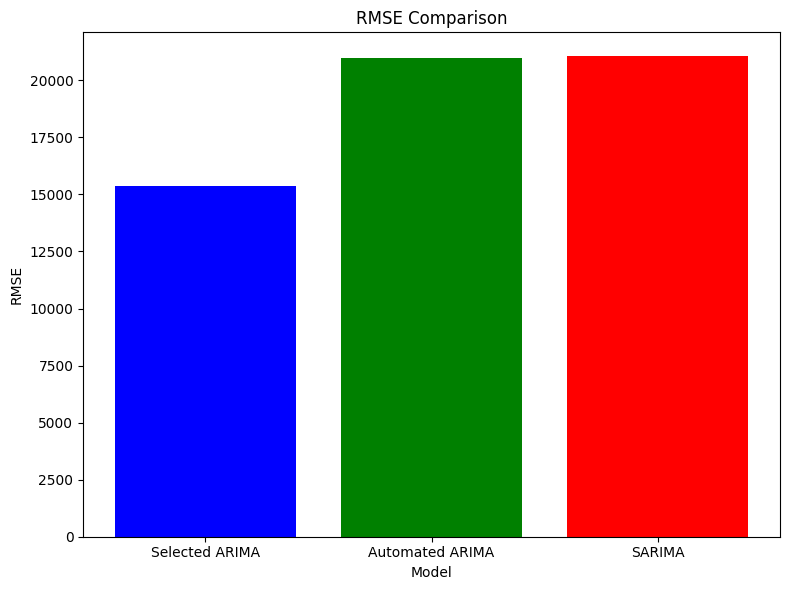

In [202]:
# Dữ liệu đầu vào
values = [rmse_ar, rmse_auto, rmse_sarima]   # Danh sách các giá trị RMSE của 3 mô hình: ARIMA thủ công, Auto ARIMA, và SARIMA
labels = ['Selected ARIMA', 'Automated ARIMA', 'SARIMA']

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])

# Thêm nhãn và tiêu đề
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')

# Căn chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()

## Conclusion
Selected ARIMA (Xanh dương):
Có giá trị RMSE nhỏ nhất so với hai mô hình còn lại, chứng tỏ đây là mô hình chính xác nhất trong ba mô hình dự đoán.  
Automated ARIMA (Xanh lá):
Có RMSE cao hơn đáng kể so với ARIMA thủ công, cho thấy việc chọn tham số tự động (Auto ARIMA) không hiệu quả bằng việc tinh chỉnh thủ công.  
SARIMA (Đỏ):
Có RMSE gần bằng Auto ARIMA, nhưng vẫn cao hơn so với ARIMA thủ công, chứng tỏ mô hình này không phù hợp với dữ liệu hoặc cần tối ưu thêm.  

Kết luận: Selected ARIMA (Thủ công) là mô hình được khuyến nghị sử dụng vì có hiệu suất dự báo tốt nhất (RMSE nhỏ nhất).